In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
sns.set_theme()

In [5]:
fp=nc.Dataset(clubb_dir+diri+file+'/k_2/c_'+str(low+1)+'/output/arm_zm.nc','r')
for f in fp.variables:
    print(f)

NameError: name 'diri' is not defined

In [4]:
clubb_dir='/home/tsw35/tyche/clubb'

In [6]:
def read_forcings(path,nz_=37):
    fp = open(path,'r')
    lines=fp.readlines()
    # determine number of timesteps first 
    t = 0
    for line in lines:
        if line[0]=='!':
            continue
        lsp = line.split(' ')
        if (lsp[1]==str(nz_) or (lsp[1]==(str(nz_)+'\n'))):
            t = t+1
    data={}
    headbool=True
    ti = -1
    alt = 0
    for line in lines:
        if line[0]=='!':
            continue
        if headbool:
            headbool = False
            lsp = line.split(' ')
            head_0 = [x for x in lsp if x != '']
            n = len(head_0)
            head=[]
            for x in head_0:
                if '\n' in x:
                    x = x[0:-1]
                head.append(x)
                data[x]=np.zeros((t,nz_))
            data['time']=[]
            continue
        lsp = line.split(' ')
        if (lsp[1]==str(nz_) or (lsp[1]==(str(nz_)+'\n'))):
            data['time'].append(float(lsp[0]))
            ti=ti+1
            alt=0
            continue
        for i in range(n):
            x = head[i]
            data[x][ti,alt]=float(lsp[i])
        alt=alt+1
    data['time']=np.array(data['time'])
    return data

In [7]:
frcs_1 = read_forcings(clubb_dir+'/test_cpl4/k_2/c_1/input/case_setups/arm_forcings.in',251)
frcs_2 = read_forcings(clubb_dir+'/test_cpl4/k_2/c_2/input/case_setups/arm_forcings.in',251)
frcs_0 = read_forcings(clubb_dir+'/test_cpl_0/k_2/c_1/input/case_setups/arm_forcings.in',251)

In [8]:
print(frcs_0.keys())

dict_keys(['Press[Pa]', 'T_f[K\\s]', 'rtm_f[kg\\kg\\s]', 'um_ref[m\\s]', 'vm_ref[m\\s]', 'um_f[m\\s^2]', 'vm_f[m\\s^2]', 'omega[Pa\\s]', 'ug[m\\s]', 'vg[m\\s]', 'time'])


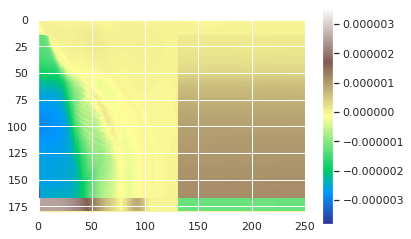

In [9]:
plt.imshow(frcs_2['rtm_f[kg\kg\s]'],cmap='terrain')
plt.colorbar()


Text(0.5, 1.0, 'Low Sensible Heat Column')

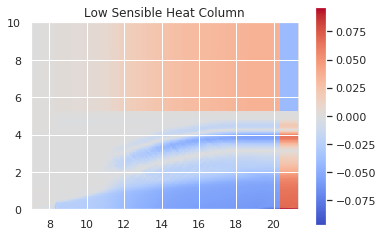

In [10]:
data = frcs_2['T_f[K\s]']
vmax = np.max(np.abs(data))
plt.imshow(np.transpose(data),cmap='coolwarm',vmin=-vmax,vmax=vmax,extent=[7,860/60+7,0,10],origin='lower')
plt.colorbar()
plt.title('Low Sensible Heat Column')

In [ ]:
d

Text(0.5, 1.0, 'High Sensible Heat Column')

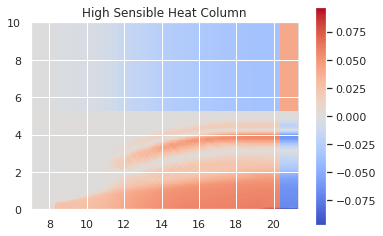

In [11]:
data = frcs_1['T_f[K\s]']
vmax = np.max(np.abs(data))
plt.imshow(np.transpose(data),cmap='coolwarm',vmin=-vmax,vmax=vmax,extent=[7,860/60+7,0,10],origin='lower')
plt.colorbar()
plt.title('High Sensible Heat Column')

[126.92406598054006, 286.3304360300354]


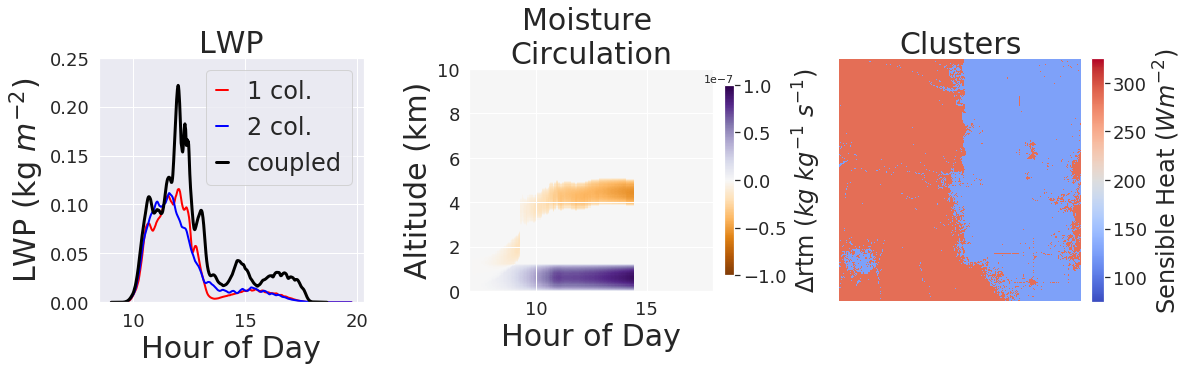

In [12]:
var = 'rtm_f[kg\\kg\\s]'
ftlrg = 30
ftmid = 24
ftsml = 18
plt.figure(figsize=(18,4.5))
for file in ['test_cpl5']:
    #if 'sgp_2' not in file:
    #    continue
    fp_nocpl = nc.Dataset(clubb_dir+'/sgp_nocpl/sgp_2017716/k_2/agg_outsfc.nc','r')
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/sgp_2017716/k_1/agg_outsfc.nc')
    fp_cpl = nc.Dataset(clubb_dir+'/'+file+'/k_2/agg_outsfc.nc','r')
    
    
    ax = plt.subplot(1,3,1)
    lwpcpl =fp_cpl['lwp'][:,0,0,0]
    lwpcpl[lwpcpl>.4]=.4
    times=np.linspace(7,54000/(60*60)+7,lwpcpl.shape[0])
    plt.plot(times[120:-135],fp_1col['lwp'][:,0,0,0][120:-200],c='red',linewidth=2)
    plt.plot(times[120:-135],fp_nocpl['lwp'][:,0,0,0][120:-200],c='blue',linewidth=2)
    plt.plot(times[120:-200],lwpcpl[120:-200],c='black',linewidth=3)
    plt.legend(['1 col.','2 col.','coupled'],fontsize=ftmid,handlelength=.5)
    plt.title('LWP',fontsize=ftlrg)
    plt.ylim(0,.25)
    plt.xlabel('Hour of Day',fontsize=ftlrg)
    plt.ylabel('LWP (kg $m^{-2})$',fontsize=ftlrg)
    ax.tick_params(axis='both', which='major', labelsize=ftsml)
    
    ax=plt.subplot(1,3,2)
    frc_c1 = clubb_dir+'/'+file+'/k_2/c_1/input/case_setups/arm_forcings.in'
    frc_c2 = clubb_dir+'/'+file+'/k_2/c_2/input/case_setups/arm_forcings.in'
    frc_o  = clubb_dir+'/test_cpl_0/k_2/c_1/input/case_setups/arm_forcings.in'
    d_c1 = read_forcings(frc_c1,251) 
    d_c2 = read_forcings(frc_c2,251) 
    d_o  = read_forcings(frc_o,251) 
    im=plt.imshow(np.transpose(d_c2[var]-d_o[var])[0:-48,:],cmap='PuOr',origin='lower',extent=[7,54000/(60*60)+7-4,0,10],vmin=-10**(-7),vmax=10**(-7))
    plt.title('Moisture \nCirculation',fontsize=ftlrg)
    cbar = plt.colorbar(im,fraction=0.036, pad=0.04)
    cbar.ax.tick_params(labelsize=ftsml) 
    cbar.set_label('$\Delta$rtm ($kg$ $kg^{-1}$ $s^{-1})$',fontsize=ftmid)
    plt.xlabel('Hour of Day',fontsize=ftlrg)
    plt.ylabel('Altitude (km)',fontsize=ftlrg)
    ax.tick_params(axis='both', which='major', labelsize=ftsml)
    
    
    plt.subplot(1,3,3)
    fp_clst = nc.Dataset(clubb_dir+'/'+file+'/k_2/clusters.nc','r')
    tindex=7
    clust=fp_clst['cluster'][tindex,:,:]
    mheat=[]
    H = fp_clst['H'][tindex,:,:]
    nmax=np.max(clust)
    for j in range(int(nmax+1)):
        mheat.append(np.mean(fp_clst['H'][tindex,:,:][clust==j]))
        clust[clust==j]=mheat[j]
    print(mheat)
    im=plt.imshow(clust,cmap='coolwarm',vmin=75,vmax=325)
    plt.grid(False)
    plt.axis('off')
    plt.title('Clusters',fontsize=ftlrg)
    cbar=plt.colorbar(im,fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=ftsml) 
    cbar.set_label('Sensible Heat $(W m^{-2})$',fontsize=ftmid)
    continue
plt.subplots_adjust(wspace=.4)

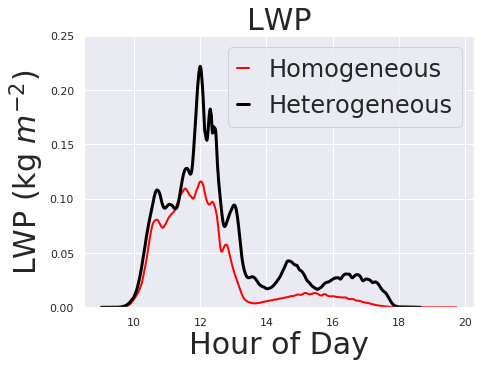

In [13]:
var = 'rtm_f[kg\\kg\\s]'
ftlrg = 30
ftmid = 24
ftsml = 18
plt.figure(figsize=(7,5))
for file in ['test_cpl5']:
    #if 'sgp_2' not in file:
    #    continue
    fp_nocpl = nc.Dataset(clubb_dir+'/sgp_nocpl/sgp_2017716/k_2/agg_outsfc.nc','r')
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/sgp_2017716/k_1/agg_outsfc.nc')
    fp_cpl = nc.Dataset(clubb_dir+'/'+file+'/k_2/agg_outsfc.nc','r')
    fp_75  = nc.Dataset(clubb_dir+'/'+'test_cpl6'+'/k_1/c_1/output/arm_sfc.nc','r')

    lwpcpl =fp_cpl['lwp'][:,0,0,0]
    lwpcpl[lwpcpl>.4]=.4
    times=np.linspace(7,54000/(60*60)+7,lwpcpl.shape[0])
    plt.plot(times[120:-135],fp_1col['lwp'][:,0,0,0][120:-200],c='red',linewidth=2)
    #plt.plot(times[120:-135],fp_nocpl['lwp'][:,0,0,0][120:-200],c='blue',linewidth=2)
    plt.plot(times[120:-200],lwpcpl[120:-200],c='black',linewidth=3)
    #plt.plot(times[120:-195],fp_75['lwp'][:,0,0,0][120:-200],c='violet',linewidth=2)
    #plt.legend(['1 col.','2 col.','coupled','C7 = .5'],fontsize=ftmid,handlelength=.5)
    plt.legend(['Homogeneous','Heterogeneous'],fontsize=ftmid,handlelength=.5)
    plt.title('LWP',fontsize=ftlrg)
    plt.ylim(0,.25)
    plt.xlabel('Hour of Day',fontsize=ftlrg)
    plt.ylabel('LWP (kg $m^{-2})$',fontsize=ftlrg)
    ax.tick_params(axis='both', which='major', labelsize=ftsml)


In [ ]:
# C7 TESTING
c7dir = '/home/tsw35/tyche/clubb/cpl_c7_testing/'
legs = []
for diri in os.listdir(c7dir):
    try:
        fp = nc.Dataset(c7dir+diri+'/k_1/c_1/output/arm_sfc.nc','r')
    except:
        continue
    legs.append(diri)
    plt.plot(fp['lwp'][:,0,0,0])

plt.legend(legs)

In [ ]:
fp11=nc.Dataset('/home/tsw35/tyche/clubb/test_cpl6/k_1/c_1/output/arm_sfc.nc','r')
fp12=nc.Dataset('/home/tsw35/tyche/clubb/test_cpl7/k_1/c_1/output/arm_sfc.nc','r')
fp13=nc.Dataset('/home/tsw35/tyche/clubb/test_cpl8/k_1/c_1/output/arm_sfc.nc','r')

In [ ]:
plt.figure()
plt.plot(fp11['lwp'][:,0,0,0])
plt.plot(fp12['lwp'][:,0,0,0])
plt.plot(fp13['lwp'][:,0,0,0])
plt.legend(['C7 = .5','C7 = .75','C7 = richardson'])

In [ ]:
fp11=nc.Dataset('/home/tsw35/tyche/clubb/test_cpl6/k_1/c_1/output/arm_sfc.nc','r')
fp12=nc.Dataset('/home/tsw35/tyche/clubb/test_cpl7/k_1/c_1/output/arm_sfc.nc','r')
fp13=nc.Dataset('/home/tsw35/tyche/clubb/test_cpl8/k_1/c_1/output/arm_sfc.nc','r')

In [ ]:
for i in fp.variables:
    try:
        plt.figure()
        plt.imshow(np.transpose(fp11[i][:,:,0,0]-fp12[i][:,:,0,0]))
        plt.colorbar()
        plt.title(i)
    except:
        print(i)
        continue

In [ ]:
fp11.close()
fp12.close()

In [ ]:
fp = nc.Dataset(c7dir+diri+'/k_1/c_1/output/arm_zt.nc','r')

In [ ]:
fp2 = nc.Dataset(c7dir+'v_0.5'+'/k_1/c_1/output/arm_zt.nc','r')

In [ ]:
for i in fp.variables:
    try:
        plt.figure()
        plt.imshow(np.transpose(fp[i][:,:,0,0]-fp2[i][:,:,0,0]))
        plt.colorbar()
        plt.title(i)
    except:
        print(i)
        continue

In [ ]:
np.shape(d_c1['time'])
len(d_c1['time'])/12

[283.42003165205233, 127.04225739934705]


(-0.5, 400.5, 400.5, -0.5)

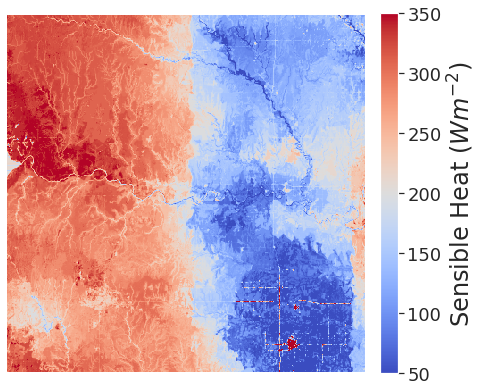

In [14]:
fp_clst = nc.Dataset(clubb_dir+'/sgp_l40000/sgp_2017716/k_2/clusters.nc','r')
tindex=7
clust=fp_clst['cluster'][tindex,:,:]
mheat=[]
H = fp_clst['H'][tindex,:,:]
H2=np.ones(H.shape)*np.mean(H)
nmax=np.max(clust)
plt.figure(figsize=(7,7))
for j in range(int(nmax+1)):
    mheat.append(np.mean(fp_clst['H'][tindex,:,:][clust==j]))
    clust[clust==j]=mheat[j]
print(mheat)
#plt.imshow(np.mean(fp_clst['H'][4:10,:,:],0),cmap='coolwarm',vmin=100,vmax=300)
im=plt.imshow(H,cmap='coolwarm',vmin=50,vmax=350)
cbar=plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=ftsml) 
cbar.set_label('Sensible Heat $(W m^{-2})$',fontsize=ftmid)
#plt.title('Surface Sensible Heat')
#plt.grid(False)
plt.axis('off')

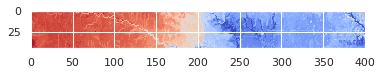

In [130]:
plt.imshow(H[5:50,:],cmap='coolwarm',vmin=50,vmax=350)

In [24]:
from sklearn.model_selection import train_test_split

In [125]:
t1 = np.array([1,2,4,2,5,6,3,6,7,4,5,7,2,2,3,1,5,4,3])
mu = np.mean(t1)
t3 = (t1[:,np.newaxis].T - mu)*(t1[:,np.newaxis]-mu)

In [127]:
t2 = t3.flatten()

In [93]:

dx=250
a,b=H.shape
x_H=np.zeros((a,b))
y_H=np.zeros((a,b))
for i in range(a):
    for j in range(b):
        x_H[i,j]=i*dx
        y_H[i,j]=j*dx

H_flat = H.flatten()
x_flat = x_H.flatten()
y_flat = y_H.flatten()
idx = np.random.choice(len(H_flat),size=5000,replace=False)
H_sb = H_flat[idx]
x_Hsb = x_flat[idx]
y_Hsb = y_flat[idx]
#gamma = (H_sb[:,np.newaxis].T - H_sb[:,np.newaxis])**2/2
mu=np.mean(H_sb)
a = (H_sb[:,np.newaxis].T - mu)*(H_sb[:,np.newaxis]-mu)
h = ((x_Hsb[:,np.newaxis] - x_Hsb.T)**2 + (y_Hsb[:,np.newaxis] - y_Hsb.T)**2)**0.5
gf = a.flatten()
hf = h.flatten()

In [276]:
#### CALCULATE LENGTHSCALE OF HETEROGENEITY ####
import random
def estimate_l_het(l_het,Hg_,cut=.25,samp=.1,u_='N',v_='N'):
    '''
        Parameters

        l_het  : -1: compute full lengthscale, -2: compute parallel to wind
        cut    : percentage cuttoff for lengthscale
        Hg     : a N by N grid of the sensible heat fluxes
        samp   : how many points to sample when constructing cov matrix
                 as a percentage of total points. sample size is half the
                 total when parallel to mean wind and samp is ignored
    '''

    # CASE 0: Regular constant lengthscale
    if l_het>-1:
        return l_het

    # Common Setup for Cases 1 and 2
    a_,b_ = Hg_.shape
    r_H = np.zeros((a_,b_))
    c_H = np.zeros((a_,b_))
    for i in range(a_):
        for j in range(b_):
            r_H[i,j]=i*dx
            c_H[i,j]=j*dx
    H_flat = Hg_.flatten()
    r_flat = r_H.flatten()
    c_flat = c_H.flatten()


    # CASE 1: Full heterogneeity 
    if l_het == -1:

        idx = np.random.choice(len(H_flat),size=int(round(len(H_flat)*samp)),replace=False)
        H_sb = H_flat[idx]
        r_Hsb = r_flat[idx]
        c_Hsb = c_flat[idx]
        mu=np.mean(H_sb)
        a = (H_sb[:,np.newaxis].T - mu)*(H_sb[:,np.newaxis]-mu)
        h = ((r_Hsb[:,np.newaxis] - r_Hsb.T)**2 + \
            (c_Hsb[:,np.newaxis] - c_Hsb.T)**2)**0.5
        Qf = a.flatten()
        hf = h.flatten()

        bins = np.linspace(0,50000,51)
        means=np.zeros((len(bins)-1,))
        for i in range(len(bins)-1):
            means[i]=np.mean(Qf[(hf>bins[i])&(hf<bins[i+1])])

        l_het_ = bins[0:-1][means<=(.25*means[0])][0]


    # CASE 2: In Direction of Mean Wind
    elif l_het == -2:
        
        # import mean wind information
        sound_path = w_dir+'/k_'+str(k)+'/c_'+str(k)+\
                   '/input/case_setups/arm_sounding.in'
        fp=open(sound_path,'r')
        u_=0
        v_=0
        for line in fp:
            if line[0]=='!':
                continue
            if line[0]=='P':
                continue
            linesp = line.split(' ')
            u_=float(linesp[3])
            v_=float(linesp[4])
        fp.close()
        
        # add random mean wind to avoid code issues under synthetic cases
        u_=u_+random.uniform(-.0001*u_,.0001*u_)
        v_=v_+random.uniform(-.0001*v_,.0001*v_)
        
        # normalize mean wind
        u_p = u_/(u_**2+v_**2)**(1/2)
        v_p = v_/(u_**2+v_**2)**(1/2)
        
        # select half the points; compute mu
        idx = np.random.choice(len(H_flat),size=len(H_flat)/2,replace=False)
        mu = np.mean(H_flat[idx])

        # x heterogeneity
        if np.abs(u_p)>(1/np.sqrt(2)):
            Qf=[]
            hf=[]
            for i in range(a_):
                idx_i = idx[r_flat[idx]==i]
                H_sbi = H_flat[idx_i]
                c_Hsbi= c_flat[idx_i]
                a = (H_sbi[:,np.newaxis].T - mu)*(H_sbi[:,np.newaxis]-mu)
                h = ((c_Hsbi[:,np.newaxis] - c_Hsbi.T)**2)**0.5
                Qf.extend(a.flatten())
                hf.extend(h.flatten())
            bins = np.linspace(0,100000,101)
            means=np.zeros((len(bins)-1,))
            Qf=np.array(Qf)
            hf=np.array(hf)
            for j in range(len(bins)-1):
                means[j]=np.mean(Qf[(hf>bins[j])&(hf<bins[j+1])])
            try:
                l_het_a = bins[0:-1][means<=(.25*means[0])][0]
            except:
                l_het_a = 100000
            a_i = 1
            a_j = 0
                
        
        # xy heterogeneity
        if (u_p*v_p)>0:
            Qf=[]
            hf=[]
            for i in range(-round(min(a_,b_)/2),round(min(a_,b_)/2)):
                idx_i = idx[(c_flat[idx]+i)==r_flat[idx]]
                H_sbi = H_flat[idx_i]
                c_Hsbi= c_flat[idx_i]
                a = (H_sbi[:,np.newaxis].T - mu)*(H_sbi[:,np.newaxis]-mu)
                h = ((c_Hsbi[:,np.newaxis] - c_Hsbi.T)**2)**0.5
                Qf.extend(a.flatten())
                hf.extend(h.flatten())
            Qf=np.array(Qf)
            hf=np.array(hf)
            bins = np.linspace(0,100000,101)
            means=np.zeros((len(bins)-1,))
            for j in range(len(bins)-1):
                means[j]=np.mean(Qf[(hf>bins[j])&(hf<bins[j+1])])
            try:
                l_het_b = bins[0:-1][means<=(.25*means[0])][0]
            except:
                l_het_b = 50000*np.sqrt(2)
                
            # i and j components of xy vector
            b_i=1/np.sqrt(2)
            b_j=1/np.sqrt(2)
        
        # x-y heterogeneity
        if (u_p*v_p)<0:
            Qf=[]
            hf=[]
            for i in range(round(min(a_,b_)/2),round(min(a_,b_)/2)*3):
                idx_i = idx[(c_flat[idx]+i)==r_flat[idx]]
                H_sbi = H_flat[idx_i]
                c_Hsbi= c_flat[idx_i]
                a = (H_sbi[:,np.newaxis].T - mu)*(H_sbi[:,np.newaxis]-mu)
                h = ((c_Hsbi[:,np.newaxis] - c_Hsbi.T)**2)**0.5
                Qf.extend(a.flatten())
                hf.extend(h.flatten())
            Qf=np.array(Qf)
            hf=np.array(hf)
            bins = np.linspace(0,100000,101)
            means=np.zeros((len(bins)-1,))
            for j in range(len(bins)-1):
                means[j]=np.mean(Qf[(hf>bins[j])&(hf<bins[j+1])])
            try:
                l_het_b = bins[0:-1][means<=(.25*means[0])][0]
            except:
                l_het_b = 50000*np.sqrt(2)
                
            # i and j components of -xy vector
            b_i=1/np.sqrt(2)
            b_j=-1/np.sqrt(2)
        

        # y heterogeneity 
        if np.abs(v_p)>(1/np.sqrt(2)):
            Qf=[]
            hf=[]
            for i in range(b):
                idx_i = idx[c_flat[idx]==i]
                H_sbi = H_flat[idx_i]
                r_Hsbi= r_flat[idx_i]
                a = (H_sbi[:,np.newaxis].T - mu)*(H_sbi[:,np.newaxis]-mu)
                h = ((r_Hsbi[:,np.newaxis] - r_Hsbi.T)**2)**(.5)
                Qf.extend(a.flatten())
                hf.extend(h.flatten())

            bins = np.linspace(0,100000,101)
            means=np.zeros((len(bins)-1,))
            Qf=np.array(Qf)
            hf=np.array(hf)
            for j in range(len(bins)-1):
                means[j]=np.mean(Qf[(hf>bins[j])&(hf<bins[j+1])])
            try:
                l_het_a = bins[0:-1][means<=(.25*means[0])][0]
            except:
                l_het_a = 100000
            
            # i and j components of y vector
            a_i=0
            a_j=1
                               
        # final computation; two cases depending on a_i
        if a_i==1:
            beta  = (v_p*a_i-u_p*a_j)/(b_j-b_i*a_j)
            alpha = (u_p-beta*b_i)/a_i
        else:
            beta  = (u_p*a_j-v_p*a_i)/(b_i-b_j*a_i)
            alpha = (v_p-beta*b_j)/a_j
        
        
        l_het_=alpha*l_het_a+beta*l_het_b
        

    return l_het_


In [278]:
list_test=[1,2,3,4,5]
for i in range(1,len(list_test)):
    print(list_test[i])
    print(list_test[i-1:i+1])

2
[1, 2]
3
[2, 3]
4
[3, 4]
5
[4, 5]


In [277]:
print(estimate_l_het(-2,H,u_=.1,v_=.1))

NameError: name 'w_dir' is not defined

In [250]:
a=[]

In [ ]:
print

In [227]:
a

30051.336423916415

In [192]:
print(a)

38806.45041818958


In [132]:
idx[1]

91299

In [94]:
g2 = np.cov(H_sb.T,H_sb)
print(g2.shape)

(2, 2)


In [109]:
np.cov(H_sb)

array(8166.63730836)

In [95]:
bins = np.linspace(0,75000,151)
means=np.zeros((len(bins)-1,))
#mgf = gf<50000
for i in range(len(bins)-1):
    means[i]=np.mean(gf[(hf>bins[i])&(hf<bins[i+1])])

lengthscale = bins[0:-1][means<=(.25*means[0])][0]

In [96]:
print(lengthscale)

36500.0


In [ ]:
plt.plot((bins[1:]+bins[0:-1])/2,means)

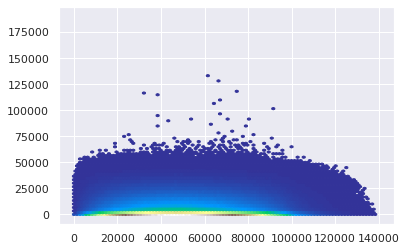

In [68]:
plt.hexbin(h.flatten(),gamma.flatten(),cmap='terrain',mincnt=10)

In [23]:
print(a*b)

160801


In [111]:
#warnings.filterwarnings('ignore')
for file in os.listdir(clubb_dir):
    try:
        fp1 = nc.Dataset(clubb_dir+'/'+file+'/k_'+str(10)+'/clusters.nc','r')
        fp2 = nc.Dataset(clubb_dir+'/'+file+'/k_'+str(10)+'/clusters.nc','r')
    except:
        continue
    if 'sgp' not in file:
        continue
    plt.figure(figsize=(6,6))
    cccdir = '/home/tsw35/soteria/clubb/'+file+'/'
    fp = nc.Dataset(cccdir+'k_'+str(10)+'/clusters.nc','r')
    clust=fp['cluster'][:,:,:]
    mheat=[]
    H = fp['H'][:]
    H2 = H[np.mean(np.mean(H,axis=2),axis=1)>20,:,:]
    Hmask=np.zeros(clust.shape,dtype=bool)
    Hmask[(np.mean(np.mean(H,axis=2),axis=1)>20),:,:]=1
    nmax=np.max(clust)
    for j in range(int(nmax+1)):
        mheat.append(np.mean(fp['H'][:,:,:][(clust==j)&Hmask]))
        clust[clust==j]=mheat[j]
    clust=np.mean(clust[:],axis=0)
    plt.imshow(clust,cmap='seismic',vmin=0,vmax=300)
    plt.title('Sensible Heat Map: '+file)
    plt.grid(False)
    plt.axis('off')
    plt.colorbar()

In [112]:
fp_clst

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): t(17), lat(401), lon(401), clst(2)
    variables(dimensions): float64 W(clst,clst), float64 cluster(t,lon,lat), float64 tskin(t,lon,lat), float64 H(t,lon,lat), float64 LE(t,lon,lat), float64 frac(clst), float64 H_clst(t,clst)
    groups: 

In [113]:
var = 'T_f[K\s]'
print(file)
#var = 'rtm_f[kg\\kg\\s]'
frc_c1 = clubb_dir+'/'+file+'/k_2/c_1/input/case_setups/arm_forcings.in'
frc_c2 = clubb_dir+'/'+file+'/k_2/c_2/input/case_setups/arm_forcings.in'
frc_o  = clubb_dir+'/test_cpl_0/k_2/c_1/input/case_setups/arm_forcings.in'
frc_nocpl = clubb_dir+'/sgp_nocpl/sgp_2017716/k_1/c_1/input/case_setups/arm_forcings.in'
frc_cold_c1 = clubb_dir+'/sgp_cpl/'+'sgp_2017716/k_2/c_1/input/case_setups/arm_forcings.in'
frc_cold_c2 = clubb_dir+'/sgp_cpl/'+'sgp_2017716/k_2/c_2/input/case_setups/arm_forcings.in'
d_c1 = read_forcings(frc_c1,251) 
d_c2 = read_forcings(frc_c2,251) 
d_o  = read_forcings(frc_o,251)
d_ncpl = read_forcings(frc_nocpl)
vmin=min(np.min(d_c1[var]),np.min(d_c2[var]),np.min(d_o[var]))
vmax=max(np.max(d_c1[var]),np.max(d_c2[var]),np.max(d_o[var]))
minpnew=np.min(d_o['Press[Pa]'][:])
maxpnew=np.max(d_o['Press[Pa]'][:])
minpold=np.min(d_ncpl['Press[Pa]'][:])
maxpold=np.max(d_ncpl['Press[Pa]'][:])
plt.figure()
plt.imshow(np.transpose(d_c1[var]),cmap='coolwarm',origin='lower',extent=[7,54000/(60*60)+7,9.7,2.723])
plt.title('Column 1 in new CPL')
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(d_c2[var]),cmap='coolwarm',origin='lower',extent=[7,54000/(60*60)+7,9.7,2.723])
plt.title('Column 2 in new CPL')
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(d_o[var]),cmap='coolwarm',origin='lower',extent=[7,54000/(60*60)+7,9.7,2.723])
plt.title('Original in new CPL')
plt.colorbar()
plt.figure()
plt.imshow(np.transpose(d_c1[var]-d_c2[var]),cmap='coolwarm',origin='lower')
plt.title('Diff c1 - c2')
plt.colorbar()

sgp_l10000


FileNotFoundError: [Errno 2] No such file or directory: '/home/tsw35/tyche/clubb/sgp_l10000/k_2/c_1/input/case_setups/arm_forcings.in'

In [114]:
d_o['Press[Pa]'][0,1]

0.0

(181, 251)
54000.0


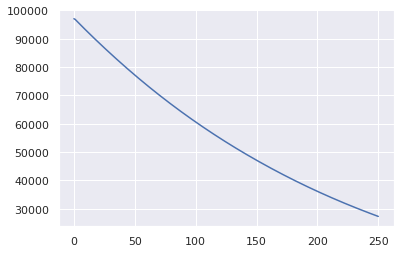

In [115]:
print(d_o[var].shape)
#print(np.unique(d_o['Press[Pa]']))
print(np.max(d_c1['time'])-np.min(d_c1['time']))
plt.plot(d_c1['Press[Pa]'][15,:])

In [117]:
fp_nocpl = nc.Dataset(clubb_dir+'/sgp_2017716/k_2/agg_outzt.nc','r')
fp_1col  = nc.Dataset(clubb_dir+'/sgp_2017716/k_1/agg_outzt.nc','r')
fp_cpl   = nc.Dataset(clubb_dir+'/'+file+'/k_2/agg_outzt.nc','r')
fp_cpl1  = nc.Dataset(clubb_dir+'/'+file+'/k_2/c_1/output/arm_zt.nc','r')
fp_cpl2  = nc.Dataset(clubb_dir+'/'+file+'/k_2/c_2/output/arm_zt.nc','r')



FileNotFoundError: [Errno 2] No such file or directory: b'/home/tsw35/tyche/clubb/sgp_2017716/k_2/agg_outzt.nc'

In [118]:
var = 'thlm'
vmax = 0
vmin = 30000
for fp in [fp_nocpl,fp_1col,fp_cpl,fp_cpl1,fp_cpl2]:
    vmax = max(np.max(fp[var][:]),vmax)
    vmin = min(np.min(fp[var][:]),vmin)
if vmin<0:
    vmax=max(np.abs(vmin),np.abs(vmax))
    vmin=-vmax

NameError: name 'fp_cpl1' is not defined

In [371]:
fp=nc.Dataset(clubb_dir+'/test_cpl7/k_2/c_1/output/arm_zt.nc','r')
fp2=nc.Dataset(clubb_dir+'/test_cpl7/k_2/c_1/output/arm_zm.nc','r')
fp3=nc.Dataset(clubb_dir+'/test_cpl7/k_2/c_1/output/arm_sfc.nc','r')
fp_clst=nc.Dataset(clubb_dir+'/test_cpl7/k_2/clusters.nc')

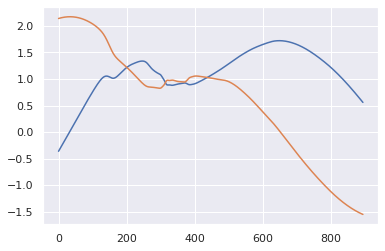

In [373]:
u=fp['um'][:,20,0,0]
v=fp['vm'][:,20,0,0]
plt.plot(u)
plt.plot(v)

In [349]:
for k in fp_clst.variables:
    print(k)

W
cluster
tskin
H
LE
frac
H_clst
t_model
u_r
z_circ


In [335]:
temp=fp['T_in_K'][:,:,0,0]
alt1=fp['altitude'][:]
alt2=fp2['altitude'][:]
cloudbase = fp3['z_cloud_base'][:,0,0,0]


In [357]:
def read_sfc_data(var,nt,stdt,override='X'):
    bnm = 'jss'+var+'_bdy_02_' #base name
    varout_g = np.zeros((nt,nx,nx))
    varout_v = np.zeros((nt,nx*nx))
    if nt == 1:
        file=override
        with open(file,'r') as fp:
            varout_v = np.array([float(i) for i in fp.readlines()])
        varout_g=np.reshape(varout_v,(nx,nx))
        return varout_g,varout_v
    for t in range(nt):
        dt = stdt+datetime.timedelta(hours=t)
        tnm = dt.strftime('%Y-%m-%d-%H-%M')
        file = sfc_dir+bnm+tnm
        with open(file,'r') as fp:
            var_v = np.array([float(i) for i in fp.readlines()])
        varout_g[t,:,:] = np.reshape(var_v,(nx,nx))
        varout_v[t,:] = var_v[:]
    return varout_g,varout_v

In [358]:
sfc_dir   = '/stor/soteria/hydro/shared/sgp_surfaces/dx0100nx1000/'

In [359]:
nx=1000

In [369]:
lon_g,lonv = read_sfc_data('',1,1,sfc_dir+'jsslongrid_02')

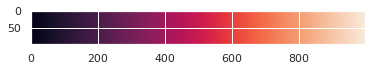

In [370]:
plt.imshow(lon_g[0:100,:])

In [340]:
temp_d=temp[:,1:]-temp[:,0:-1]
pbl = np.zeros((temp.shape[0],))
for i in range(len(pbl)):
    try:
        pbl[i]=alt1[:-1][temp_d[i,:]>0][0]
    except:
        pbl[i]=0

In [329]:
frcs_1 = read_forcings(clubb_dir+'/test_cpl7/k_2/c_1/arm_forcings_f.in',251)
frcs_2 = read_forcings(clubb_dir+'/test_cpl7/k_2/c_1/arm_forcings_f.in',251)

Text(0.5, 1.0, 'High Sensible Heat Column')

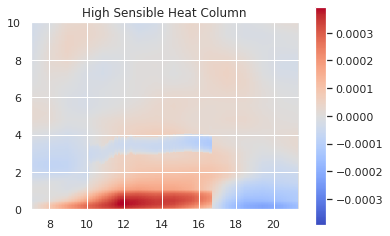

In [332]:
data = frcs_1['T_f[K\s]']#-frcs_2['T_f[K\s]']
vmax = np.max(np.abs(data))
plt.imshow(np.transpose(data),cmap='coolwarm',vmin=-vmax,vmax=vmax,extent=[7,860/60+7,0,10],origin='lower')
plt.colorbar()
plt.title('High Sensible Heat Column')

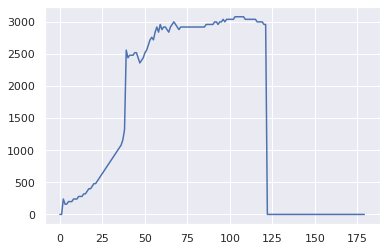

In [333]:
plt.plot(fp_clst['z_circ'][:])

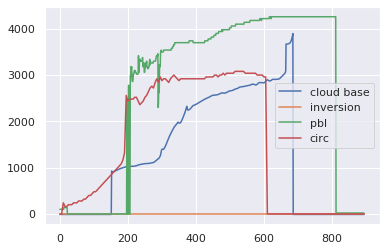

In [344]:
plt.plot(fp3['z_cloud_base'][:,0,0,0])
plt.plot(fp3['z_inversion'][:,0,0,0])
plt.plot(pbl)
plt.plot(np.linspace(0,len(fp3['z_cloud_base'][:,0,0,0]),len(fp_clst['z_circ'][:])),fp_clst['z_circ'][:])
plt.legend(['cloud base','inversion','pbl','circ'])

In [119]:
data = fp_cpl1[var][:,:,0,0]-fp_cpl2[var][:,:,0,0]
vmax = np.max(data)
vmin = np.min(data)
if vmin<0:
    vmax=max(np.abs(vmin),np.abs(vmax))
    vmin=-vmax
vmin = -2
vmax = 2
plt.imshow(np.transpose(data),cmap='coolwarm',origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
plt.colorbar()
plt.title(var+' Difference Between Columns')
plt.xlabel('Time of day (Hours)')
plt.ylabel('Altitude (Km)')



NameError: name 'fp_cpl1' is not defined

In [120]:
data = fp_cpl1[var][:,:,0,0]
vmax = np.max(data)
vmin = np.min(data)
if vmin<0:
    vmax=max(np.abs(vmin),np.abs(vmax))
    vmin=-vmax

plt.imshow(np.transpose(data),cmap='coolwarm',origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
plt.colorbar()
plt.title(var+' Difference Between Coupled; Non-Coupled')
plt.xlabel('Time of day (Hours)')
plt.ylabel('Altitude (Km)')

NameError: name 'fp_cpl1' is not defined

In [121]:
data = fp_cpl2[var][:,:,0,0]
vmax = np.max(data)
vmin = np.min(data)
if vmin<0:
    vmax=max(np.abs(vmin),np.abs(vmax))
    vmin=-vmax

plt.imshow(np.transpose(data),cmap='coolwarm',origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
plt.colorbar()
plt.title(var+' Difference Between Coupled; Non-Coupled')
plt.xlabel('Time of day (Hours)')
plt.ylabel('Altitude (Km)')

NameError: name 'fp_cpl2' is not defined

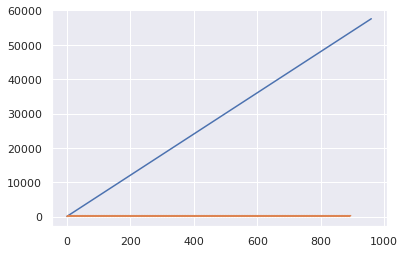

In [122]:
plt.plot(fp_nocpl['time'][:])
plt.plot(fp_cpl['time'][:])

FileNotFoundError: [Errno 2] No such file or directory: b'/home/tsw35/tyche/clubb/cpl_lhet_testing2/l_100/k_2/agg_outsfc.nc'

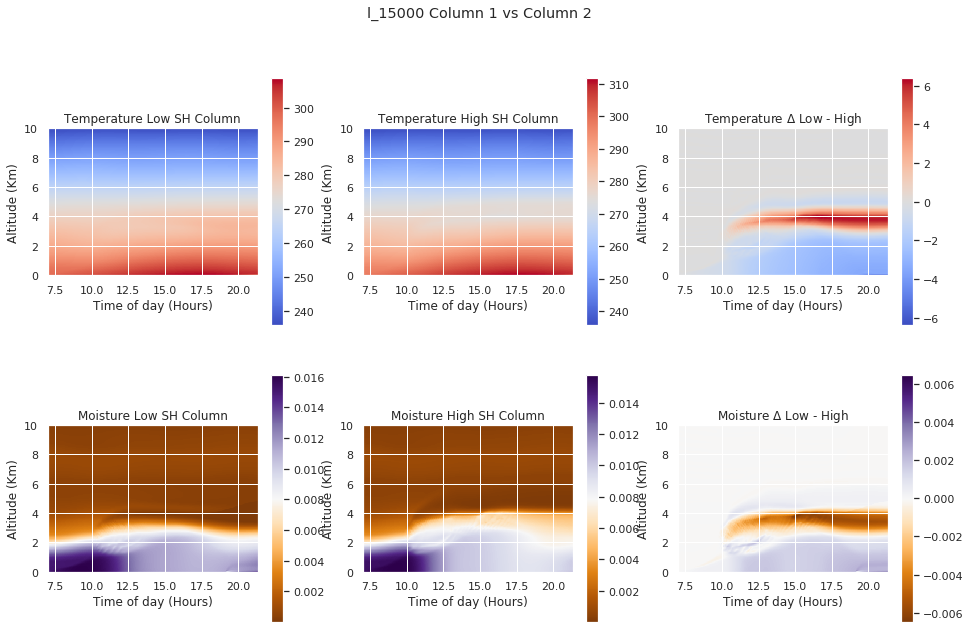

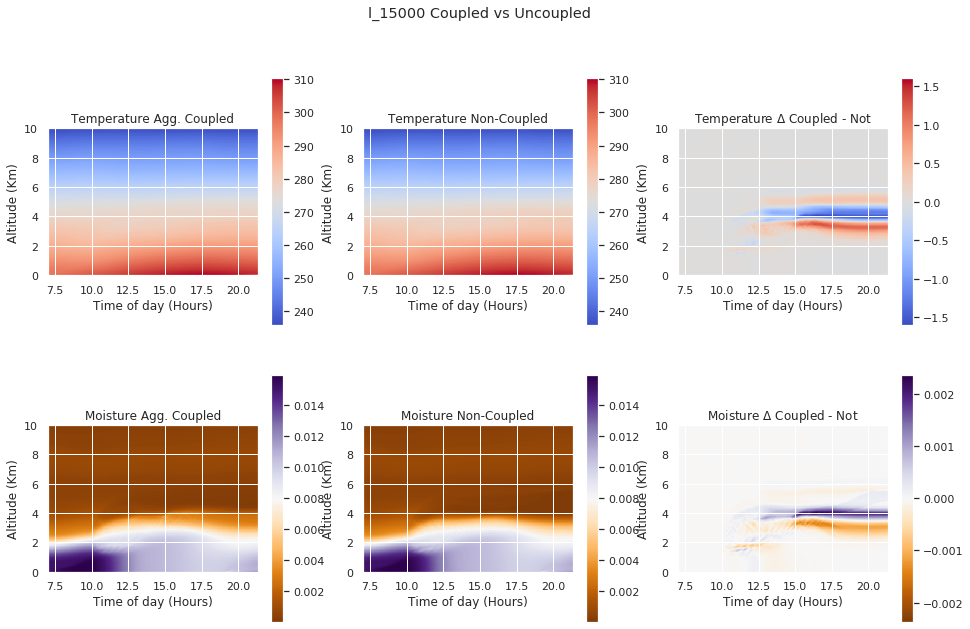

In [123]:
cpl_dir=clubb_dir+'/cpl_lhet_testing2/'
f_nagsf = nc.Dataset(cpl_dir+'l_0/k_2/agg_outsfc.nc','r')
f_nagzt = nc.Dataset(cpl_dir+'l_0/k_2/agg_outzt.nc','r')
f_nagzm = nc.Dataset(cpl_dir+'l_0/k_2/agg_outzm.nc','r')
f_nfrc  = read_forcings(cpl_dir+'l_0/k_2/c_1/input/case_setups/arm_forcings.in',251)
for file in os.listdir(cpl_dir):
    #if file =='l_0':
    #    continue
    
    # Read in a shitton of files
    fp_clst = nc.Dataset(cpl_dir+file+'/k_2/clusters.nc','r')
    f_cagsf = nc.Dataset(cpl_dir+file+'/k_2/agg_outsfc.nc','r')
    f_cagzt = nc.Dataset(cpl_dir+file+'/k_2/agg_outzt.nc','r')
    f_cagzm = nc.Dataset(cpl_dir+file+'/k_2/agg_outzm.nc','r')
    
    a = np.mean(fp_clst['H_clst'][:],axis=0)
    if a[0]>a[1]:
        low=2
        hi =1
    else:
        low=1
        hi =2
    f_cclfrc = read_forcings(cpl_dir+file+'/k_2/c_'+str(low)+'/input/case_setups/arm_forcings.in',251)
    f_cchfrc = read_forcings(cpl_dir+file+'/k_2/c_'+str(hi)+'/input/case_setups/arm_forcings.in',251)
    f_cclsf = nc.Dataset(cpl_dir+file+'/k_2/c_'+str(low)+'/output/arm_sfc.nc','r')
    f_cclzt = nc.Dataset(cpl_dir+file+'/k_2/c_'+str(low)+'/output/arm_zt.nc','r')
    f_cchsf = nc.Dataset(cpl_dir+file+'/k_2/c_'+str(hi)+'/output/arm_sfc.nc','r')
    f_cchzt = nc.Dataset(cpl_dir+file+'/k_2/c_'+str(hi)+'/output/arm_zt.nc','r')
    
    var_o = ['T_in_K','rtm']
    var_f = ['T_f[K\\s]','rtm_f[kg\\kg\\s]']
    titles_1=['Low SH Column','High SH Column','$\Delta$ Low - High']
    titles_2=['Agg. Coupled','Non-Coupled','$\Delta$ Coupled - Not']
    i = 0
    
    plt.figure(figsize=(16,10))
    for var in var_o:
        if var=='rtm':
            name = 'Moisture'
            cmap = 'PuOr'
        elif var=='T_in_K':
            name = 'Temperature'
            cmap = 'coolwarm'
        else:
            name = var
            cmap = 'terrain'
        
        for y in range(len(titles_1)):
            plt.subplot(2,3,y+1+i)
            data1 = f_cclzt[var][:,:,0,0]
            data2 = f_cchzt[var][:,:,0,0]
            if y==0:
                data = data1
                vmax = max(np.max(data1),np.max(data2))
                vmin = min(np.max(data1),np.max(data2))
            elif y==1:
                data = data2
                vmax = max(np.max(data1),np.max(data2))
                vmin = min(np.max(data1),np.max(data2))
            elif y==2:
                data = f_cclzt[var][:,:,0,0]-f_cchzt[var][:,:,0,0]
            # C_low
            vmax = np.max(data)
            vmin = np.min(data)
            if vmin<0:
                vmax=max(np.abs(vmin),np.abs(vmax))
                vmin=-vmax
            plt.imshow(np.transpose(data),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
            plt.colorbar()
            plt.title(name+' '+titles_1[y])
            plt.xlabel('Time of day (Hours)')
            plt.ylabel('Altitude (Km)')
        i = 3
    plt.suptitle(file+' Column 1 vs Column 2')
    plt.figure(figsize=(16,10))
    i=0
    for var in var_o:
        if var=='rtm':
            name = 'Moisture'
            cmap = 'PuOr'
        elif var=='T_in_K':
            name = 'Temperature'
            cmap = 'coolwarm'
        else:
            name = var
            cmap = 'terrain'
        
        for y in range(len(titles_2)):
            plt.subplot(2,3,y+1+i)
            data1 = f_cagzt[var][:,:,0,0]
            data2 = f_nagzt[var][:,:,0,0]
            if y==0:
                data = data1
                vmax = max(np.max(data1),np.max(data2))
                vmin = min(np.min(data1),np.min(data2))
            elif y==1:
                data = data2
                vmax = max(np.max(data1),np.max(data2))
                vmin = min(np.min(data1),np.min(data2))
            elif y==2:
                data = f_cagzt[var][:,:,0,0]-f_nagzt[var][:,:,0,0]
                vmax = np.max(data)
                vmin = np.min(data)
            # C_low
            if vmin<0:
                vmax=max(np.abs(vmin),np.abs(vmax))
                vmin=-vmax
            plt.imshow(np.transpose(data),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
            plt.colorbar()
            plt.title(name+' '+titles_2[y])
            plt.xlabel('Time of day (Hours)')
            plt.ylabel('Altitude (Km)')
        i = 3
    plt.suptitle(file+' Coupled vs Uncoupled')
    #for var in var_f:
    

In [ ]:
f_cagzt = nc.Dataset(cpl_dir+'l_25000'+'/k_2/agg_outzt.nc','r')

In [ ]:
plt.imshow(f_cagzt['p_in_Pa'][:,:,0,0])

FileNotFoundError: [Errno 2] No such file or directory: b'/home/tsw35/tyche/clubb/cpl_lhet_testing2/l_40000/k_2/clusters.nc'

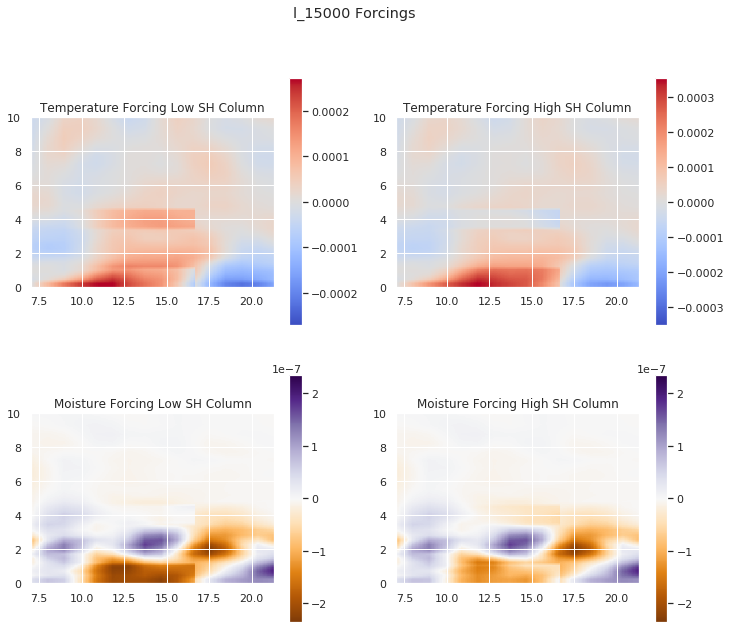

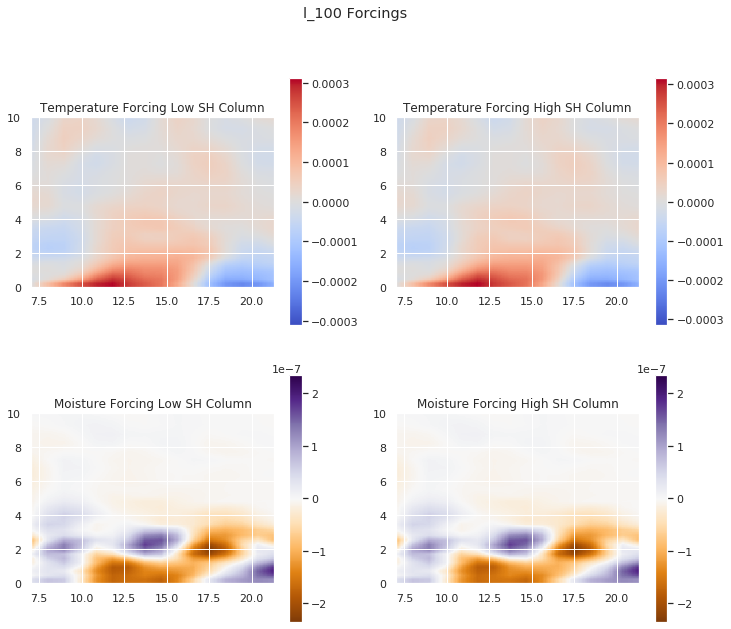

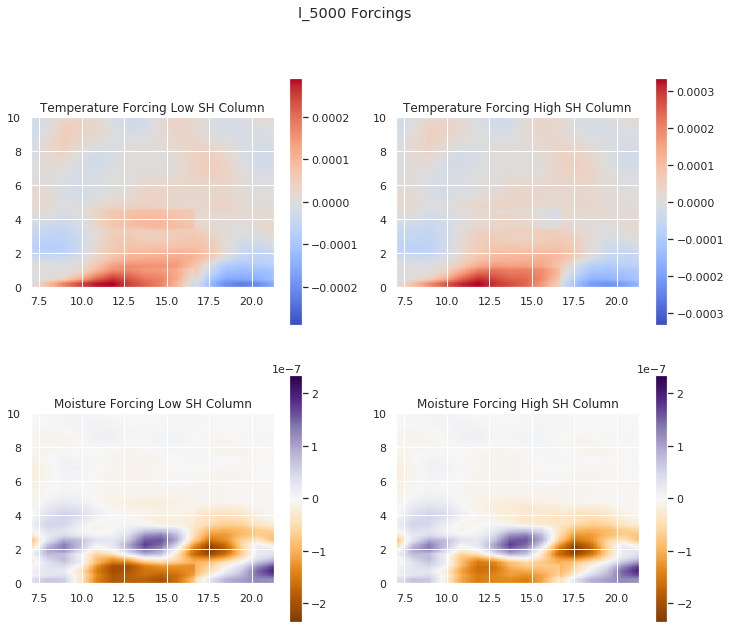

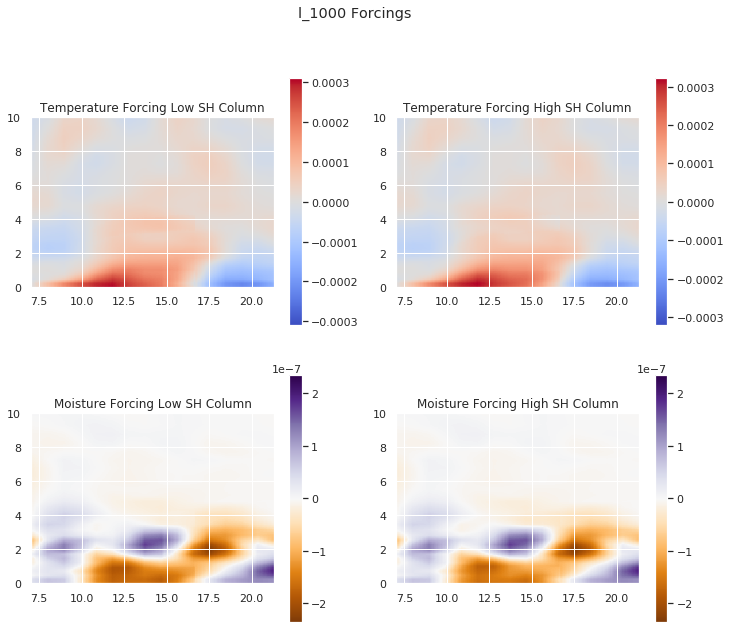

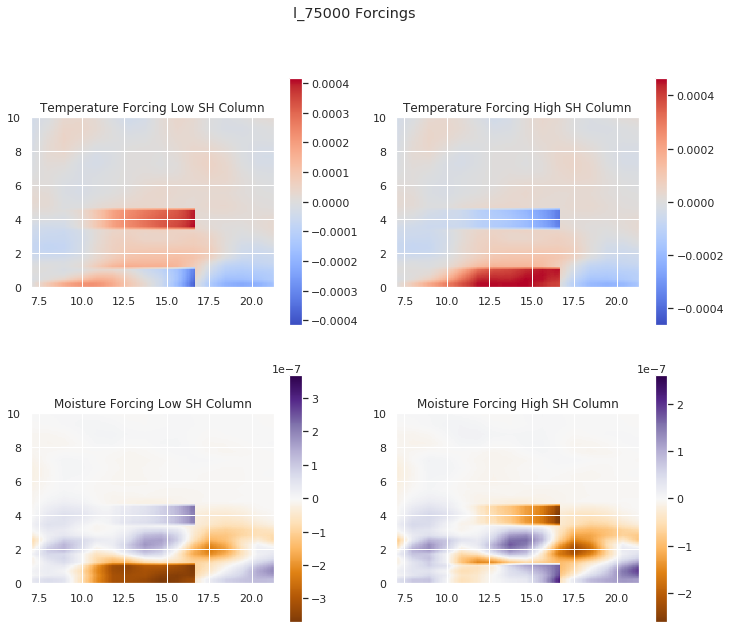

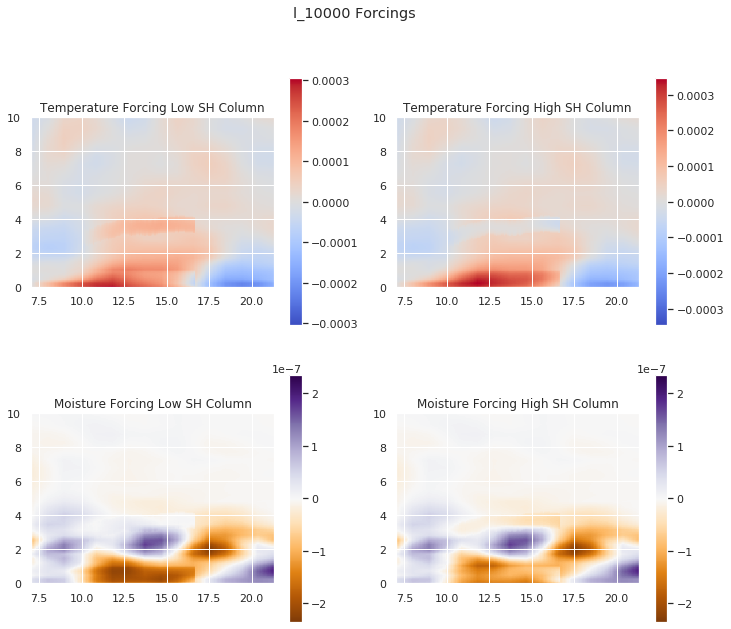

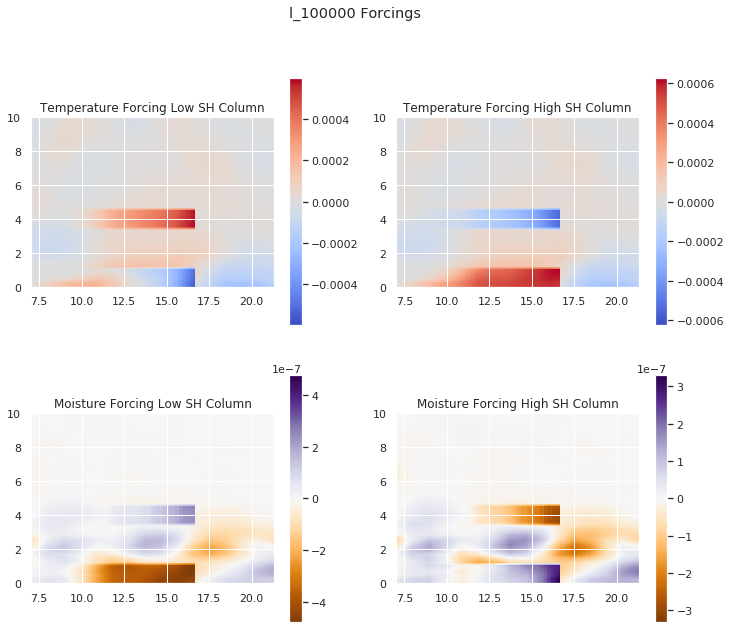

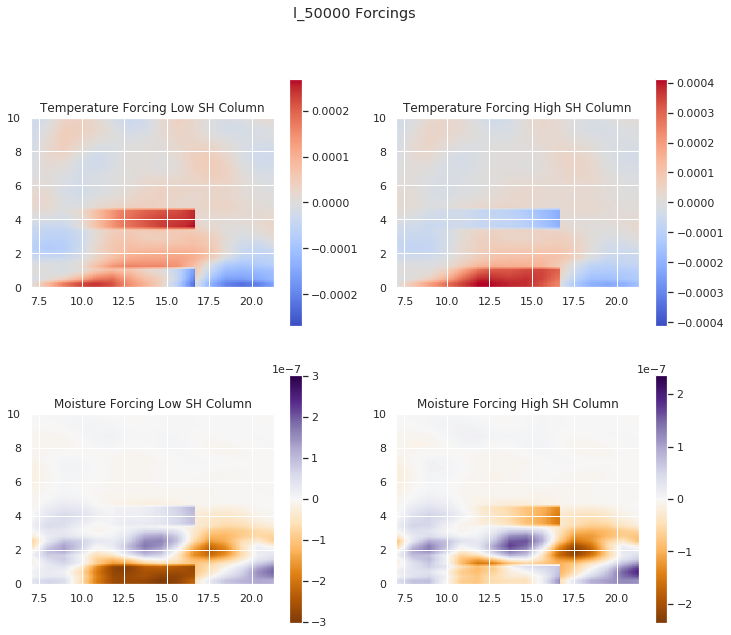

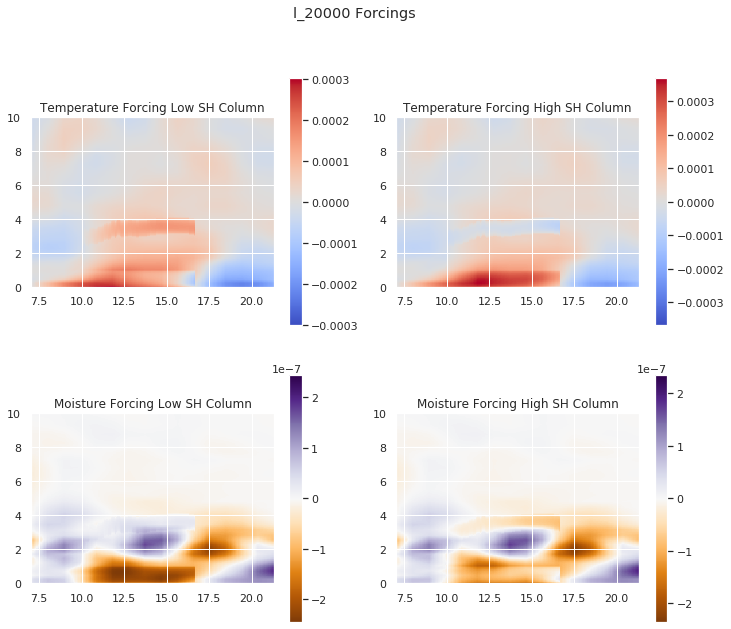

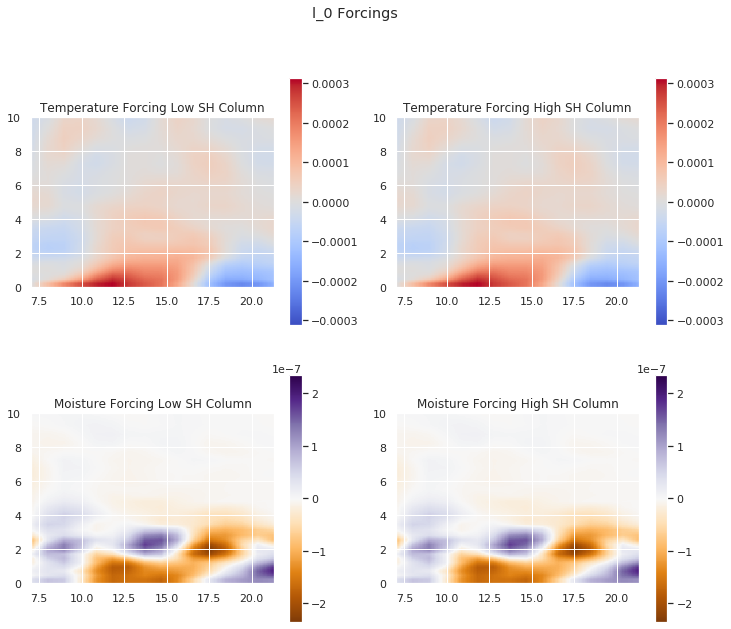

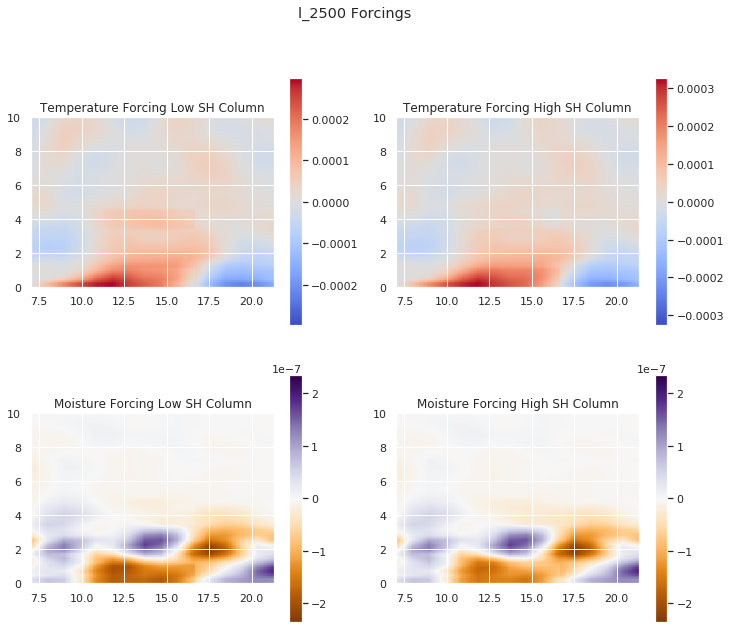

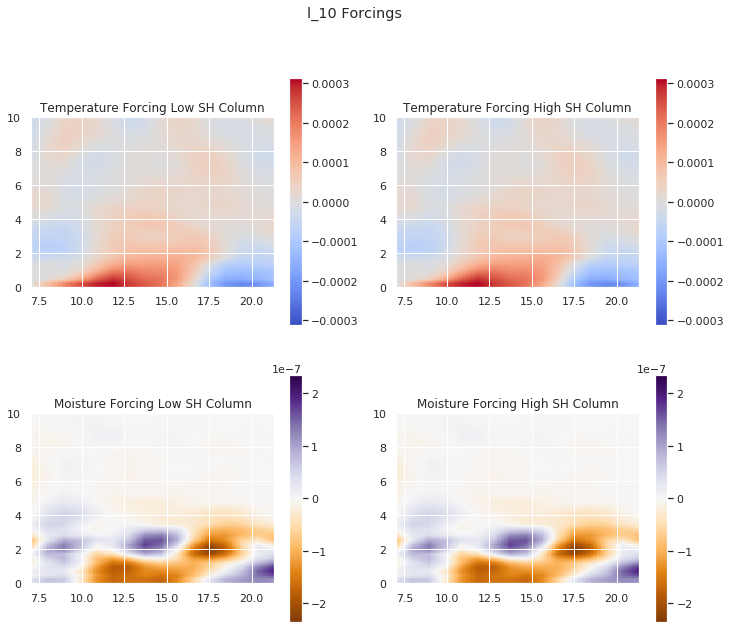

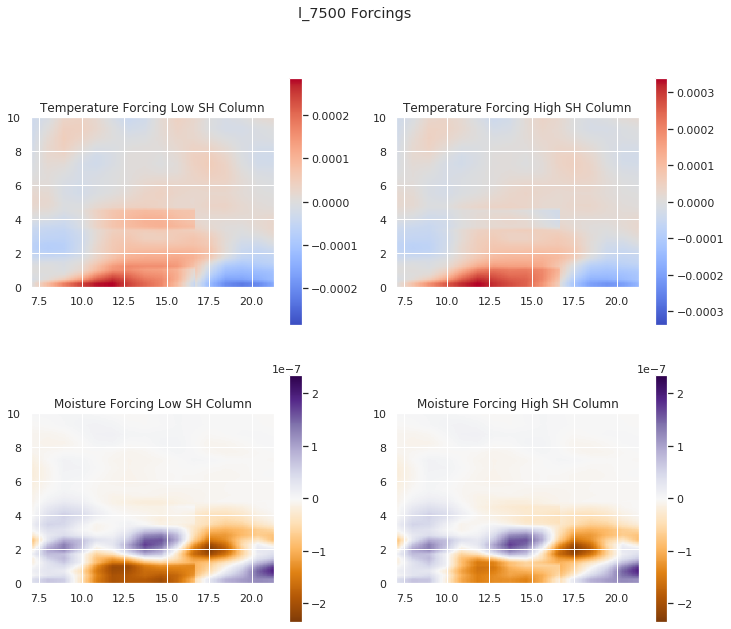

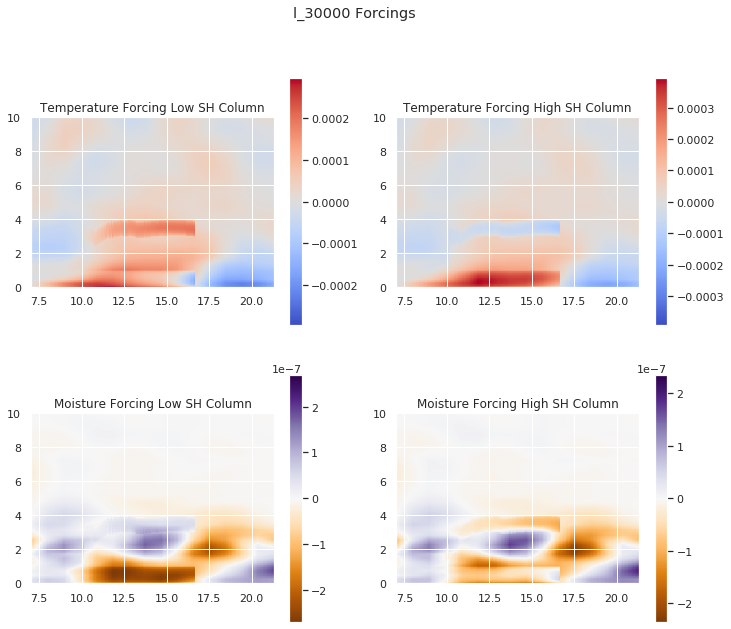

In [124]:
for file in os.listdir(cpl_dir):
    fp_clst = nc.Dataset(cpl_dir+file+'/k_2/clusters.nc','r')
    
    a = np.mean(fp_clst['H_clst'][:],axis=0)
    if a[0]>a[1]:
        low=2
        hi =1
    else:
        low=1
        hi =2
    f_cclfrc = read_forcings(cpl_dir+file+'/k_2/c_'+str(low)+'/input/case_setups/arm_forcings.in',251)
    f_cchfrc = read_forcings(cpl_dir+file+'/k_2/c_'+str(hi)+'/input/case_setups/arm_forcings.in',251)
    i = 1
    plt.figure(figsize=(12,10))
    for var in ['T_f[K\s]','rtm_f[kg\kg\s]']:
        if var=='rtm_f[kg\kg\s]':
            name = 'Moisture'
            cmap = 'PuOr'
        elif var=='T_f[K\s]':
            name = 'Temperature'
            cmap = 'coolwarm'
        else:
            name = var
            cmap = 'terrain'
            
        plt.subplot(2,2,i)
        data = f_cclfrc[var]
        vmax = np.max(data)
        vmin = np.min(data)
        if vmin<0:
            vmax=max(np.abs(vmin),np.abs(vmax))
            vmin=-vmax
        plt.imshow(np.transpose(data),vmin=vmin,vmax=vmax,cmap=cmap,extent=[7,860/60+7,0,10],origin='lower')
        plt.title(name+' Forcing Low SH Column')
        plt.colorbar()
        i=i+1
        
        plt.subplot(2,2,i)
        data = f_cchfrc[var]
        vmax = np.max(data)
        vmin = np.min(data)
        if vmin<0:
            vmax=max(np.abs(vmin),np.abs(vmax))
            vmin=-vmax
        plt.imshow(np.transpose(data),vmin=vmin,vmax=vmax,cmap=cmap,extent=[7,860/60+7,0,10],origin='lower')
        plt.title(name+' Forcing High SH Column')
        plt.colorbar()
        i=i+1
    plt.suptitle(file+' Forcings')
plt.figure(figsize=(10,8))
i=1
for var in ['T_f[K\s]','rtm_f[kg\kg\s]']:
    if var=='rtm_f[kg\kg\s]':
        name = 'Moisture'
        cmap = 'PuOr'
    elif var=='T_f[K\s]':
        name = 'Temperature'
        cmap = 'coolwarm'
    else:
        name = var
        cmap = 'terrain'
    plt.subplot(1,2,i)
    data = f_nfrc[var]
    vmax = np.max(data)
    vmin = np.min(data)
    if vmin<0:
        vmax=max(np.abs(vmin),np.abs(vmax))
        vmin=-vmax
    plt.imshow(np.transpose(data),vmin=vmin,vmax=vmax,cmap=cmap,extent=[7,860/60+7,0,10],origin='lower')
    plt.title(name+' Forcing Low SH Column')
    plt.colorbar()
    i=i+1
plt.suptitle('Base Forcings')

In [ ]:
f_nagsf.variables.keys()

In [ ]:
f_nagzm.variables.keys()

In [ ]:
f_nagzt.variables.keys()

In [ ]:
listd = os.listdir(cpl_dir)
listd.sort()
print(listd)
lhetlist = [0,10,100,1000,10000,20000,30000,40000,50000,75000,100000]
# 'T_f[K\s]','rtm_f[kg\kg\s]'

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lhetlist = [0,10,100,1000,10000,20000,30000,40000,50000,75000,100000]
plt.figure(figsize=(12,16))
colors=plt.cm.copper(np.linspace(0,1,12-2))
colors[0]=[1,0,0,1]
# lwp, TKE, rtmfrcs_lower, Tfrcs_lower, T_lower, rtm_lower, 

for num in range(len(lhetlist)-2):
    file = 'l_'+str(lhetlist[num])
    f_cagsf = nc.Dataset(cpl_dir+file+'/k_2/agg_outsfc.nc','r')
    f_cagzt = nc.Dataset(cpl_dir+file+'/k_2/agg_outzt.nc','r')
    f_cagzm = nc.Dataset(cpl_dir+file+'/k_2/agg_outzm.nc','r')
    fp_clst = nc.Dataset(cpl_dir+file+'/k_2/clusters.nc','r')
    
    
    a = np.mean(fp_clst['H_clst'][:],axis=0)
    if a[0]>a[1]:
        low=2
        hi =1
    else:
        low=1
        hi =2
    f_cclfrc = read_forcings(cpl_dir+file+'/k_2/c_'+str(low)+'/input/case_setups/arm_forcings.in',251)
    f_cchfrc = read_forcings(cpl_dir+file+'/k_2/c_'+str(hi)+'/input/case_setups/arm_forcings.in',251)
    
    times = np.linspace(7,np.max(f_cclfrc['time'][:])/60/60-7,len(f_cagzt['thlm'][:]))
    
    plt.subplot(4,2,1)
    plt.plot(times,f_cagsf['lwp'][:,0,0,0],color=colors[num])
    
    plt.subplot(4,2,2)
    data = .5*np.sum(f_cagzm['wp2'][:,:,0,0]+f_cagzm['up2'][:,:,0,0]+f_cagzm['vp2'][:,:,0,0],axis=1)
    plt.plot(times,data,color=colors[num])
    
    plt.subplot(4,2,3)
    data = np.mean(f_cagzt['thlm'][:,0:50,0,0],axis=1)
    plt.plot(times,data,color=colors[num])
    
    plt.subplot(4,2,4)
    data = np.mean(f_cagzt['rtm'][:,0:50,0,0],axis=1)
    plt.plot(times,data,color=colors[num])
    
    plt.subplot(4,2,5)
    data = np.mean(f_cclfrc['T_f[K\s]'][:,0:50],axis=1)
    plt.plot(f_cclfrc['time'][:]/60/60+7,data,color=colors[num])
    
    plt.subplot(4,2,6)
    data = np.mean(f_cclfrc['rtm_f[kg\kg\s]'][:,0:50],axis=1)
    plt.plot(f_cclfrc['time'][:]/60/60+7,data,color=colors[num])
    
    plt.subplot(4,2,7)
    data = np.mean(f_cchfrc['T_f[K\s]'][:,0:50],axis=1)
    plt.plot(f_cclfrc['time'][:]/60/60+7,data,color=colors[num])
    
    plt.subplot(4,2,8)
    data = np.mean(f_cchfrc['rtm_f[kg\kg\s]'][:,0:50],axis=1)
    plt.plot(f_cclfrc['time'][:]/60/60+7,data,color=colors[num])

lhetlist=lhetlist[:-2]
plt.subplot(4,2,1)
plt.title('LWP')
plt.legend(lhetlist)
plt.ylim(0,.3)

plt.subplot(4,2,2)
plt.title('TKE')
plt.legend(lhetlist)
plt.ylim(0,350)

plt.subplot(4,2,3)
plt.title('Temperature')
plt.legend(lhetlist)
plt.ylim(304,315)

plt.subplot(4,2,4)
plt.title('Moisture')
plt.legend(lhetlist)
plt.ylim(.008,.015)

plt.subplot(4,2,5)
plt.title('Low SH Temperature Forcing')
plt.legend(lhetlist)
plt.ylim(-.00025,.00025)

plt.subplot(4,2,6)
plt.title('Low SH Moisture Forcing')
plt.legend(lhetlist)
plt.ylim(-.000000125,.000000075)

plt.subplot(4,2,7)
plt.title('High SH Temperature Forcing')
plt.legend(lhetlist)
plt.ylim(-.00025,.00025)

plt.subplot(4,2,8)
plt.title('High SH Moisture Forcing')
plt.legend(lhetlist)
plt.ylim(-.0000001,.0000001)
    

In [ ]:
f_cclfrc['Press[Pa]'][0,0]

In [ ]:
plt.plot(f_cagsf['lwp'][:,0,0,0])

In [ ]:
var = 'T_f[K\s]'
import warnings
warnings.filterwarnings('ignore')
diri = '/sgp_l80000/'
for file in os.listdir(clubb_dir+diri):
    #if 'sgp_2' not in file:
    #    continue
    fp_nocpl = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_2/agg_outsfc.nc','r')
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_1/agg_outsfc.nc')
    fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
    plt.figure(figsize=(18,6.66))
    
    # LWP
    plt.subplot(2,4,1)
    lwpcpl =fp_cpl['lwp'][:,0,0,0]
    times=np.linspace(7,54000/(60*60)+7,lwpcpl.shape[0])
    e1 = 200+(times.shape[0]-fp_1col['lwp'].shape[0])
    en = 200+(times.shape[0]-fp_nocpl['lwp'].shape[0])
    plt.plot(times[:-e1],fp_1col['lwp'][:,0,0,0][:-200],c='red')
    plt.plot(times[:-en],fp_nocpl['lwp'][:,0,0,0][:-200],c='blue')
    plt.plot(times[:-200],lwpcpl[:-200],c='black')
    plt.legend(['1 col','2 col.','2 col cpl'])
    plt.title('Liquid Water Path',fontsize=ftsml)
    plt.xlabel('Hour of Day')
    plt.ylabel('LWP $(kg m^{-2})$')
    
    # MAP
    plt.subplot(2,4,5)
    fp_clst = nc.Dataset(clubb_dir+diri+file+'/k_2/clusters.nc','r')
    tindex=7
    clust=fp_clst['cluster'][tindex,:,:]
    mheat=[]
    H = fp_clst['H'][tindex,:,:]
    nmax=np.max(clust)
    for j in range(int(nmax+1)):
        mheat.append(np.mean(fp_clst['H'][tindex,:,:][clust==j]))
        clust[clust==j]=mheat[j]
    print(mheat)
    if mheat[0]>mheat[1]:
        low =1
    else:
        low =0
    plt.imshow(clust,cmap='seismic',vmin=100,vmax=400)
    plt.grid(False)
    plt.axis('off')
    #plt.title(file[3:]+': $\Delta H=$'+str(np.abs(mheat[1]-mheat[0])))
    plt.title(file[4:],fontsize=ftsml)
    plt.colorbar()
    
    # Column 1 Forcing
    plt.subplot(2,4,2)
    frc_c1 = clubb_dir+diri+file+'/k_2/c_1/input/case_setups/arm_forcings.in'
    frc_c2 = clubb_dir+diri+file+'/k_2/c_2/input/case_setups/arm_forcings.in'
    #frc_o  = clubb_dir+'/sgp_nocpl/'+file+'k_2/c_1/input/case_setups/arm_forcings.in'
    if low==0:
        data = read_forcings(frc_c1,251)['rtm_f[kg\kg\s]']
    if low==1:
        data=read_forcings(frc_c2,251)['rtm_f[kg\kg\s]']
    cmap='PuOr'
    vmin=-3*10**-7
    vmax=3*10**-7
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
    plt.title('Forcing + Circulation\nCold Patch',fontsize=ftsml)
    cbar=plt.colorbar(ticks=[])
    plt.xlabel('Hour of Day')
    plt.ylabel('Altitude (km)')
    
    # Column 2 Forcing
    plt.subplot(2,4,3)
    if low==1:
        data = read_forcings(frc_c1,251)['rtm_f[kg\kg\s]']
    if low==0:
        data=read_forcings(frc_c2,251)['rtm_f[kg\kg\s]']
    cmap='PuOr'
    vmin=-3*10**-7
    vmax=3*10**-7
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',vmin=vmin,vmax=vmax,extent=[7,860/60+7,0,10])
    cbar=plt.colorbar()
    cbar.set_label('$\Delta$rtm ($kg$ $kg^{-1}$ $s^{-1})$')
    plt.title('Forcing + Circulation\nWarm Patch',fontsize=ftsml)
    plt.xlabel('Hour of Day')
    plt.ylabel('Altitude (km)')
    
    '''
    # Aggregated Profile
    plt.subplot(2,4,4)
    fp=nc.Dataset(clubb_dir+'/sgp_cpl/'+file+'/k_2/agg_outzt.nc','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    plt.colorbar()
    plt.title('Aggregated Profile')
    '''
    
    # Low H PROFILE
    plt.subplot(2,4,6)
    fp=nc.Dataset(clubb_dir+diri+file+'/k_2/c_'+str(low+1)+'/output/arm_zt.nc','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    plt.colorbar(ticks=[])
    plt.title('Cold Patch Moisture',fontsize=ftsml)
    high = np.abs(low-1)
    plt.xlabel('Hour of Day')
    plt.ylabel('Altitude (km)')
    
    # HIGH H PROFILE
    plt.subplot(2,4,7)
    fp=nc.Dataset(clubb_dir+diri+file+'/k_2/c_'+str(high+1)+'/output/arm_zt.nc','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    cbar = plt.colorbar()
    plt.title('Warm Patch Moisture',fontsize=ftsml)
    cbar.set_label('rtm ($kg$ $kg^{-1}$')
    plt.xlabel('Hour of Day')
    plt.subplots_adjust(hspace=.4,wspace=.3)
    plt.ylabel('Altitude (km)')
    
    '''
    # Non Coupled PROFILE
    plt.subplot(2,4,8)
    fp=nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_2/agg_outzt.nc','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    plt.colorbar()
    plt.title('Non Coupled Profile')
    '''

In [ ]:
np.sqrt([5000,10000,20000,40000,80000])/np.sqrt(20000)

In [ ]:
var = 'T_f[K\s]'
import warnings
warnings.filterwarnings('ignore')
diri = '/sgp_nocpl/'
flist = os.listdir(clubb_dir+diri)
flist.sort()
for file in flist:
    #if 'sgp_2' not in file:
    #    continue
    fp_nocpl = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_2/agg_outsfc.nc','r')
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_1/agg_outsfc.nc')
    diri = '/sgp_l'+str(10000)+'/'
    fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
    lwpcpl = fp_cpl['lwp'][:,0,0,0]
    #fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
    
    plt.figure(figsize=(5,3.3))
    times=np.linspace(7,54000/(60*60)+7,lwpcpl.shape[0])
    e1 = 200+(times.shape[0]-fp_1col['lwp'].shape[0])
    en = 200+(times.shape[0]-fp_nocpl['lwp'].shape[0])
    plt.plot(times[:-e1],fp_1col['lwp'][:,0,0,0][:-200],c='red')
    plt.plot(times[:-en],fp_nocpl['lwp'][:,0,0,0][:-200],c='blue')
    
    colors = ['gainsboro','silver','darkgrey','dimgrey','black']
    lhets = [5000,10000,20000,40000,80000]
    for i in range(5):
        diri = '/sgp_l'+str(lhets[i])+'/'
        fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
        lwpcpl = fp_cpl['lwp'][:,0,0,0]
        try:
            plt.plot(times[:-200],lwpcpl[:-200],c=colors[i])
        except:
            print('Failure '+file+' '+str(lhets[i]))
            continue
    
    
    plt.legend(['1 col','2 col.','0.5x','0.7x','1.0x','1.4x','2.0x'])
    plt.title('Liquid Water Path: '+str(file[4:]))
    plt.xlabel('Hour of Day')
    plt.ylabel('LWP $(kg m^{-2})$')

In [ ]:
plt.plot(fp_cpl['z_cloud_base'][:,0,0,0])

In [ ]:
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

diri = '/sgp_nocpl/'
flist = os.listdir(clubb_dir+diri)
flist.sort()
plt.figure(figsize=(11,11))
flist = ['sgp_2017728','sgp_2016518','sgp_2017524','sgp_2016625']
j = 1
for file in flist:
    #if 'sgp_2' not in file:
    #    continue
    ax=plt.subplot(2,2,j)
    ax.tick_params(axis='both', which='major', labelsize=ftsml)
    fp_nocpl = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_2/agg_outsfc.nc','r')
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_1/agg_outsfc.nc')
    diri = '/sgp_l'+str(10000)+'/'
    fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
    lwpcpl = fp_cpl['lwp'][:,0,0,0]
    #fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
    
    times=np.linspace(7,54000/(60*60)+7,lwpcpl.shape[0])
    e1 = 200+(times.shape[0]-fp_1col['lwp'].shape[0])
    en = 200+(times.shape[0]-fp_nocpl['lwp'].shape[0])
    st = 50
    plt.plot(times[st:-e1],fp_1col['lwp'][:,0,0,0][st:-200],c='red',linewidth=2)
    #plt.plot(times[st:-en],fp_nocpl['lwp'][:,0,0,0][st:-200],c='blue',linewidth=3)
    
    colors = ['gainsboro','silver','darkgrey','dimgrey','black']
    lhets = [5000,10000,20000,40000,80000]
    for i in range(5):
        diri = '/sgp_l'+str(lhets[i])+'/'
        fp_cpl = nc.Dataset(clubb_dir+diri+file+'/k_2/agg_outsfc.nc','r')
        lwpcpl = fp_cpl['lwp'][:,0,0,0]
        try:
            plt.plot(times[st:-200],lwpcpl[st:-200],c=colors[i],linewidth=2)
        except:
            print('Failure '+file+' '+str(lhets[i]))
            continue
    
    datestr = 'Response '
    if j ==1:
        datestr = datestr+'A'
    if j ==2:
        datestr = datestr+'B'
    if j ==3:
        datestr = datestr+'C'
    if j ==4:
        datestr = datestr+'D'
    if j == 2:
        plt.legend(['1 col.','0.5x','0.7x','1.0x','1.4x','2.0x'],handlelength=.5,fontsize=ftmid)
    plt.title(datestr,fontsize=ftlrg)
    if j>2:
        plt.xlabel('Hour of Day',fontsize=ftlrg)
    if (j==1) or (j==3):
        plt.ylabel('LWP $(kg m^{-2})$',fontsize=ftlrg)
    j = j+1
plt.subplots_adjust(hspace=.4,wspace=.2)

In [374]:
dirq = '/stor/soteria/hydro/shared/data/tylersclutter/doz_clubbtrim_0'
flist = os.listdir(dirq+'0/')
flist.sort()
import matplotlib.dates as mdates
for file in flist:
    if '2019' in file:
        continue
    elif '2018' in file:
        continue
    elif '2015' in file:
        continue
    
    fp1 = nc.Dataset(dirq+'0/'+file,'r')
    fp2 = nc.Dataset(dirq+'1/'+file,'r')
    
    dt1 = datetime.datetime(2016,1,1,0,0)
    times_js = []
    for t in range(len(fp1['time'][:])):
        times_js.append(dt1+datetime.timedelta(minutes=int(fp1['time'][t]))-datetime.timedelta(hours=5))
        
    file2 = 'sgp_'+str(times_js[0].year)+str(times_js[0].month)+str(times_js[0].day)
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file2+'/k_1/agg_outsfc.nc')
    diri = '/sgp_l'+str(80000)+'/'
    fp_cpl = nc.Dataset(clubb_dir+diri+file2+'/k_2/agg_outsfc.nc','r')
    
        
    dt1 = times_js[0]
    dt1 = dt1-datetime.timedelta(hours=dt1.hour)+datetime.timedelta(hours=7)
    times_clb1 = []
    for t in range(len(fp_1col['time'][:])):
        times_clb1.append(dt1+datetime.timedelta(seconds=int(fp_1col['time'][t])))
    
    times_clbc=[]
    for t in range(len(fp_cpl['time'][:])):
        times_clbc.append(dt1+datetime.timedelta(minutes=t+1))
    
    
    plt.figure(figsize=(8,2.5))
    ax=plt.subplot(121)
    myFmt = mdates.DateFormatter('%H')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(times_js,fp2['lwp'][:])
    plt.plot(times_js,fp1['lwp'][:])
    plt.xlabel('Hour of Day')
    plt.ylabel('LWP $(kg m^{-2})$')
    #plt.legend(['Homogeneous','Heterogeneous'])
    
    plt.title('LES '+file[10:-3])
    ax=plt.subplot(122)
    myFmt = mdates.DateFormatter('%H')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(times_clb1,fp_1col['lwp'][:,0,0,0])
    plt.plot(times_clbc,fp_cpl['lwp'][:,0,0,0])
    #plt.legend(['Single Column','Multi-Column'])
    plt.title('CLUBB '+file[10:-3])
    plt.xlabel('Hour of Day')

FileNotFoundError: [Errno 2] No such file or directory: b'/home/tsw35/tyche/clubb/sgp_nocpl/sgp_2016518/k_1/agg_outsfc.nc'

In [ ]:
dirq = '/stor/soteria/hydro/shared/data/tylersclutter/doz_clubbtrim_0'
flist = os.listdir(dirq+'0/')
flist[5]

In [ ]:
dirq = '/stor/soteria/hydro/shared/data/tylersclutter/doz_clubbtrim_0'
flist = os.listdir(dirq+'0/')
flist.sort()
import matplotlib.dates as mdates
flist = ['clubbtrim_20170609.nc','clubbtrim_20170720.nc','clubbtrim_20170627.nc','clubbtrim_20170524.nc']
plt.figure(figsize=(10,13))
j = 1
for file in flist:
    if '2019' in file:
        continue
    elif '2018' in file:
        continue
    elif '2015' in file:
        continue
    
    fp1 = nc.Dataset(dirq+'0/'+file,'r')
    fp2 = nc.Dataset(dirq+'1/'+file,'r')
    
    dt1 = datetime.datetime(2016,1,1,0,0)
    times_js = []
    for t in range(len(fp1['time'][:])):
        times_js.append(dt1+datetime.timedelta(minutes=int(fp1['time'][t]))-datetime.timedelta(hours=5))
        
    file2 = 'sgp_'+str(times_js[0].year)+str(times_js[0].month)+str(times_js[0].day)
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file2+'/k_1/agg_outsfc.nc')
    diri = '/sgp_l'+str(80000)+'/'
    fp_cpl = nc.Dataset(clubb_dir+diri+file2+'/k_2/agg_outsfc.nc','r')
    
        
    dt1 = times_js[0]
    dt1 = dt1-datetime.timedelta(hours=dt1.hour)+datetime.timedelta(hours=7)
    times_clb1 = []
    for t in range(len(fp_1col['time'][:])):
        times_clb1.append(dt1+datetime.timedelta(seconds=int(fp_1col['time'][t])))
    
    times_clbc=[]
    for t in range(len(fp_cpl['time'][:])):
        times_clbc.append(dt1+datetime.timedelta(minutes=t+1))
    
    datestr = file[10:14]+'-'+file[14:16]+'-'+file[16:18]
    
    ax=plt.subplot(4,2,j)
    myFmt = mdates.DateFormatter('%H')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(times_js,fp2['lwp'][:],linewidth=2)
    plt.plot(times_js,fp1['lwp'][:],linewidth=2)
    if j>6:
        plt.xlabel('Hour of Day',fontsize=ftlrg)
    else:
        ax.axes.xaxis.set_ticklabels([])
    if j == 1:
        plt.legend(['Homogeneous','Heterogeneous'],handlelength=.25,fontsize=18)
    plt.title('LES '+datestr,fontsize=ftlrg)
    ax.tick_params(axis='both', which='major', labelsize=ftsml)
    plt.xlim(times_js[0],times_js[-18])
    
    if j == 3:
        plt.ylabel('LWP $(kg m^{-2})$',fontsize=ftlrg)
        ax.get_yaxis().set_label_coords(-.22,0)
    
    j = j+1
    ax=plt.subplot(4,2,j)
    myFmt = mdates.DateFormatter('%H')
    ax.xaxis.set_major_formatter(myFmt)
    plt.plot(times_clb1,fp_1col['lwp'][:,0,0,0],linewidth=2)
    plt.plot(times_clbc,fp_cpl['lwp'][:,0,0,0],linewidth=2)
    plt.xlim(times_clb1[0],times_clb1[-231])
    if j == 2:
        plt.legend(['Single Col.','Multi-Col.'],handlelength=.25,fontsize=18)
    plt.title('CLUBB '+datestr,fontsize=ftmid)
    if j>6:
        plt.xlabel('Hour of Day',fontsize=ftlrg)
    else:
        ax.axes.xaxis.set_ticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=ftsml)
    
    j=j+1
    
plt.subplots_adjust(hspace=.3,wspace=.22)
    

In [ ]:
print(times_clb1[-231])
print(times_js[-18])

In [ ]:
(22-7)/960

In [ ]:
dirq = '/stor/soteria/hydro/shared/data/tylersclutter/doz_clubbtrim_0'
flist = os.listdir(dirq+'0/')
flist.sort()
cdif=[]
ldif=[]
for file in flist:
    if '2019' in file:
        continue
    elif '2018' in file:
        continue
    elif '2015' in file:
        continue
    
    fp1 = nc.Dataset(dirq+'0/'+file,'r')
    fp2 = nc.Dataset(dirq+'1/'+file,'r')
    
    dt1 = datetime.datetime(2016,1,1,0,0)
    times_js = []
    for t in range(len(fp1['time'][:])):
        times_js.append(dt1+datetime.timedelta(minutes=int(fp1['time'][t]))-datetime.timedelta(hours=5))
        
    file2 = 'sgp_'+str(times_js[0].year)+str(times_js[0].month)+str(times_js[0].day)
    fp_1col = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file2+'/k_1/agg_outsfc.nc')
    diri = '/sgp_l'+str(40000)+'/'
    fp_cpl = nc.Dataset(clubb_dir+diri+file2+'/k_2/agg_outsfc.nc','r')
    
        
    dt1 = times_js[0]
    dt1 = dt1-datetime.timedelta(hours=dt1.hour)+datetime.timedelta(hours=7)
    times_clb1 = []
    for t in range(len(fp_1col['time'][:])):
        times_clb1.append(dt1+datetime.timedelta(seconds=int(fp_1col['time'][t])))
    times_clb1=np.array(times_clb1)
    
    times_clbc=[]
    for t in range(len(fp_cpl['time'][:])):
        times_clbc.append(dt1+datetime.timedelta(minutes=t+1))
    times_clbc=np.array(times_clbc)
    
    lent = min(len(times_clbc),len(times_clb1))
    
    times_clbc=times_clbc[:lent-1]
    times_clb1=times_clb1[:lent-1]
    
    '''
    try:
        kernel_size = 50
        kernel = np.ones(kernel_size) / kernel_size
        lwpcplc = np.convolve(fp_cpl['lwp'][:lent-1,0,0,0], kernel, mode='same')
        lwp1col = np.convolve(fp_1col['lwp'][:lent-1,0,0,0], kernel, mode='same')
        
        plt.figure()
        plt.plot(times_js,fp1['lwp'][:]-fp2['lwp'][:])
        #plt.plot(times_clbc,fp_cpl['lwp'][:lent-1,0,0,0]-fp_1col['lwp'][:lent-1,0,0,0])
        plt.plot(times_clbc,lwpcplc-lwp1col)
        plt.legend(['LES','CLUBB'])
        plt.title(file[10:])
    except:
        continue
    '''
    try:
        ccdif=np.sum(fp_cpl['lwp'][:lent-1,0,0,0]-fp_1col['lwp'][:lent-1,0,0,0])/np.sum(fp_cpl['lwp'][:lent-1,0,0,0])
        lldif=np.sum(fp1['lwp'][:]-fp2['lwp'][:])/np.sum(fp1['lwp'][:])
    except:
        continue
    cdif.append(ccdif)
    ldif.append(lldif)
plt.figure(figsize=(5,5))
plt.scatter(cdif,ldif)
plt.xlim([0,.5])
plt.ylim([0,.5])

In [ ]:
import scipy.stats
r_value = scipy.stats.pearsonr(cdif, ldif)[0]
plt.figure(figsize=(5,5))
plt.scatter(cdif,ldif)
plt.plot([-1,1],[-1,1])
plt.xlim([-.15,.4])
plt.ylim([-.15,.4])
#plt.xlim(-100,1000)
#plt.ylim(-100,1000)
print(r_value)
print(r_value**2)

In [ ]:
print(times_js[0])
print(file)
print(file2)
print(times_clbc[0])

In [ ]:
print(file)

In [ ]:
print(file2)

In [88]:
print(fp_1col['time'][0:5])

[ 60. 120. 180. 240. 300.]


[92.10202745531451, 265.52754755960314]


Text(0, 0.5, 'Altitude (km)')

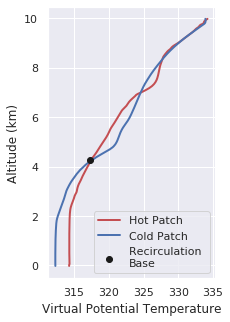

In [26]:
date = 'sgp_2017627'
sgpdir = clubb_dir+'/sgp_l20000/'+date
file1= '/home/tsw35/tyche/clubb/sgp_l20000/'+date+'/k_2/c_1/output/old/arm_zt_120.nc'
file2= '/home/tsw35/tyche/clubb/sgp_l20000/'+date+'/k_2/c_2/output/old/arm_zt_120.nc'
fp1=nc.Dataset(file1,'r')
fp2=nc.Dataset(file2,'r')

file = date
fp_clst = nc.Dataset(clubb_dir+'/sgp_l20000/'+file+'/k_2/clusters.nc','r')
tindex=7
clust=fp_clst['cluster'][tindex,:,:]
mheat=[]
H = fp_clst['H'][tindex,:,:]
nmax=np.max(clust)
for j in range(int(nmax+1)):
    mheat.append(np.mean(fp_clst['H'][tindex,:,:][clust==j]))
    clust[clust==j]=mheat[j]
print(mheat)

#for l in fp.variables.keys():
#    try:
#        print(fp[l].long_name)
#    except:
#        print(l)
plt.figure(figsize=(3,5))
plt.plot(fp2['thvm'][0,:,0,0],fp2['altitude'][:]/1000,'r',linewidth=2)
plt.plot(fp1['thvm'][0,:,0,0],fp1['altitude'][:]/1000,'b',linewidth=2)
plt.scatter(317.33,4.25,c='k',zorder=5)
plt.legend(['Hot Patch','Cold Patch','Recirculation \nBase'],loc='lower right')
plt.xlabel('Virtual Potential Temperature')
plt.ylabel('Altitude (km)')

IndexError: cloud_base_z not found in /

[265.583810821599, 92.22835200337155]


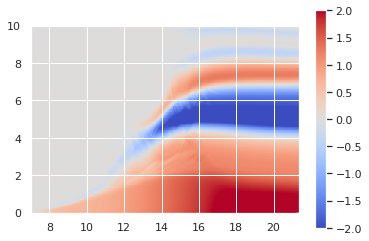

In [28]:
sgpdir = clubb_dir+'/sgp_cpl/sgp_2017627'
file1= '/home/tsw35/tyche/clubb/sgp_nocpl/sgp_2017627/k_2/c_1/output/arm_zt.nc'
file2= '/home/tsw35/tyche/clubb/sgp_nocpl/sgp_2017627/k_2/c_2/output/arm_zt.nc'
fp1=nc.Dataset(file1,'r')
fp2=nc.Dataset(file2,'r')

file = 'sgp_2017627'
fp_clst = nc.Dataset(clubb_dir+'/sgp_nocpl/'+file+'/k_2/clusters.nc','r')
tindex=7
clust=fp_clst['cluster'][tindex,:,:]
mheat=[]
H = fp_clst['H'][tindex,:,:]
nmax=np.max(clust)
for j in range(int(nmax+1)):
    mheat.append(np.mean(fp_clst['H'][tindex,:,:][clust==j]))
    clust[clust==j]=mheat[j]
print(mheat)

#for l in fp.variables.keys():
#    try:
#        print(fp[l].long_name)
#    except:
#        print(l)
plt.imshow(np.transpose(fp1['thvm'][:,:,0,0]-fp2['thvm'][:,:,0,0]),cmap='coolwarm',vmin=-2,vmax=2,origin='lower_left',extent=[7,860/60+7,0,10])
plt.colorbar()

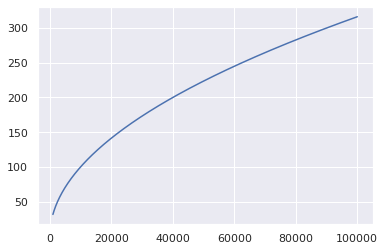

In [463]:
x = np.linspace(1000,100000,1000)
plt.plot(x,np.sqrt(x))

<BarContainer object of 15 artists>

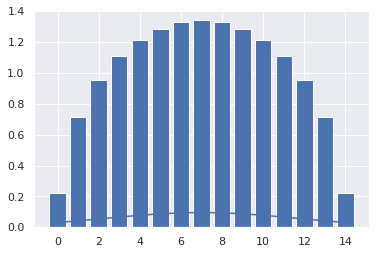

In [442]:
from scipy.stats import norm
dz_=15
adj = norm.pdf(np.linspace(norm.ppf(1/dz_),norm.ppf((dz_-1)/dz_),dz_))
adj=adj/np.sum(adj)
np.sum(adj)
plt.plot(adj)

from scipy.stats import beta
a = 1.5
b = 1.5
#adj = beta.pdf(np.linspace(beta.ppf(1/dz_,a,b),beta.ppf((dz_-1)/dz_,a,b),dz_),a,b)
adj = beta.pdf(np.linspace(beta.ppf(.001,a,b),beta.ppf(.999,a,b),dz_),a,b)
adj =adj/np.sum(adj)*dz_
plt.bar(np.linspace(0,dz_-1,dz_),adj)
#plt.plot([0,24],[1/25,1/25])

In [444]:
a = np.array([-3,-2,-1,-.5,.2,.6,.9,1,2,5,6,8])
np.where(a>0)
a[4]

0.2

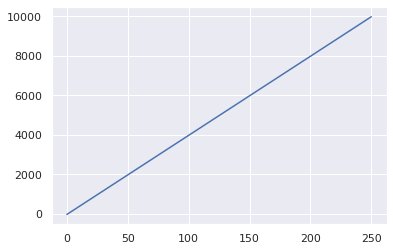

In [389]:
plt.plot(fp['altitude'][:])

In [ ]:
  # Aggregated Profile
    plt.subplot(2,3,3)
    fp=nc.Dataset(clubb_dir+'/sgp_cpl/'+file+'/k_2/agg_outzt.nc','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    plt.colorbar()
    plt.title('Aggregated Profile')
    
    # Low H PROFILE
    plt.subplot(2,3,5)
    fp=nc.Dataset(clubb_dir+'/sgp_cpl/'+file+'/k_2/c_'+str(low+1)+'/output/','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    plt.colorbar()
    plt.title('Aggregated Profile')
    
    # HIGH H PROFILE
    plt.subplot(2,3,6)
    fp=nc.Dataset(clubb_dir+'/sgp_cpl/'+file+'/k_2/agg_outzt.nc','r')
    data=fp['rtm'][:,:,0,0]
    plt.imshow(np.transpose(data),cmap=cmap,origin='lower',extent=[7,860/60+7,0,10])
    plt.colorbar()
    plt.title('Aggregated Profile')

In [411]:
## SITES
nlcd='/stor/soteria/hydro/private/nc153/data/NLCD/NLCD_2016_Land_Cover_Science_product_L48_20190424.img'
import rasterio

In [416]:
print(os.getcwd())

/stor/soteria/hydro/private/tsw35/clubb/clubb_scripts


In [413]:
fp=rasterio.open(nlcd)

In [414]:
data=fp.read(1)

In [415]:
plt.imshow(data)

MemoryError: Unable to allocate 62.7 GiB for an array with shape (104424, 161190) and data type float32

<Figure size 1800x1200 with 1 Axes>